<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Transport_and_Logistics_Econometrics_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Installing and Importing Libraries ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 39.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt
Successfully imported 'arch_model' for GARCH modeling.
All libraries loaded (check preceding messages for specific warnings/errors).

--- Starting Part II: Data Preparation ---
Research Focus: Analyzing the explanatory power, dynamic properties, and portfolio integration of ESG in relation to asset returns.
Loaded ESG data: 56254 rows, 6 columns.
ESG columns: ['Date', 'Total-Score', 'E-Score', 'S-Score', 'G-Score', 'Ticker']
Initial ESG NaNs:
 Date               0
Total-Score        0
E-Score        15342
S-Score        15342
G-Score        15342
Ticker             0
dtype: int64
Filtered ESG data to date range: 50864 rows.

--- Imputing Missing ESG Data (MICE and Fallback) ---
Found 41616 total missing values in score colu

<Figure size 1200x800 with 0 Axes>

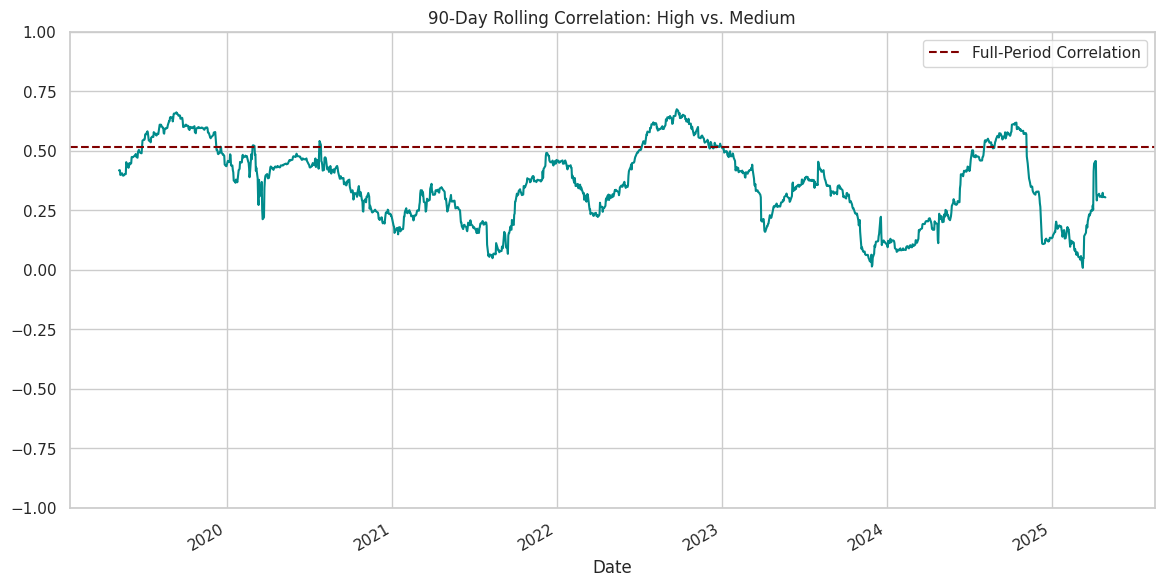

MGARCH models analyze the conditional covariance matrix of multiple series (e.g., portfolio returns).
They are complex and computationally intensive. Full implementation omitted for brevity. Libraries like 'arch' (DCC-GARCH) or 'statsmodels' can be used.

--- 4. Explanatory Machine Learning Analysis (Pivoted Goal) ---
Goal: Use ML models to identify the most important *explanatory* variables and their non-linear effects on ESG portfolio returns.
Using features: ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']

--- ML Models for Portfolio: Medium_Portfolio_Excess_Return (TimeSeriesSplit) ---

  --- Fold 1/5 ---

  --- Fold 2/5 ---
  Train data shape: (330, 6), Test data shape: (329, 6)

  --- Fold 3/5 ---
  Train data shape: (659, 6), Test data shape: (329, 6)

  --- Fold 4/5 ---
  Train data shape: (988, 6), Test data shape: (329, 6)

  --- Fold 5/5 ---
  Train data shape: (1317, 6), Test data shape: (329, 6)

ML Model Performance Summary for Medium_Portfolio_Excess_Return (Average over 5

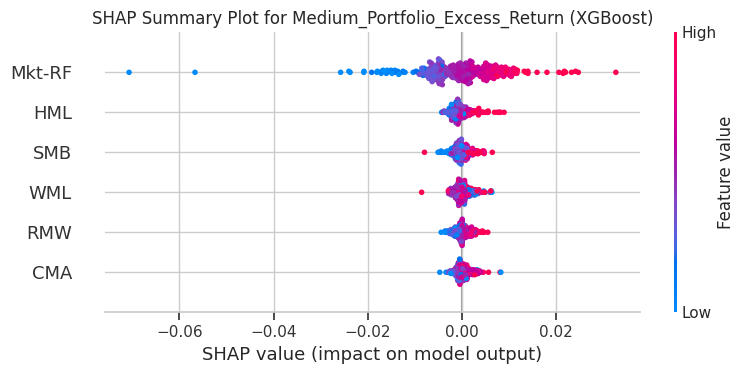


SHAP Dependence Plot for Mkt-RF on Medium_Portfolio_Excess_Return:


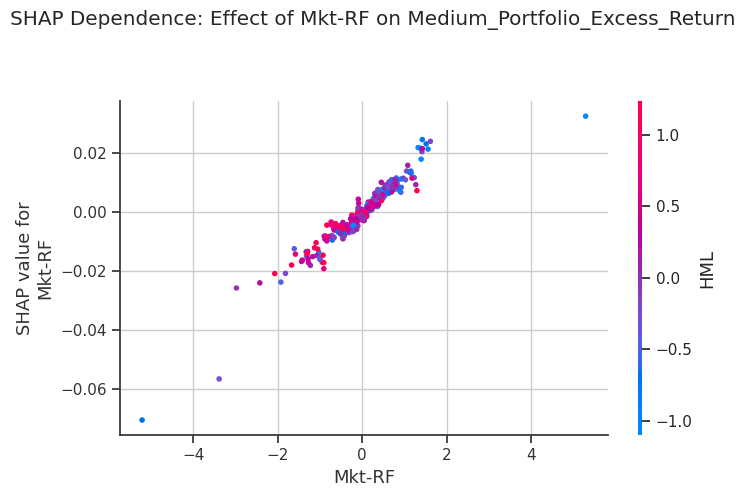


--- Feature Importance for Medium_Portfolio_Excess_Return ---
XGBoost Feature Importance:
  Feature  Importance
0  Mkt-RF    0.540454
4     CMA    0.108180
5     WML    0.104204
2     HML    0.099102
3     RMW    0.074641
1     SMB    0.073419


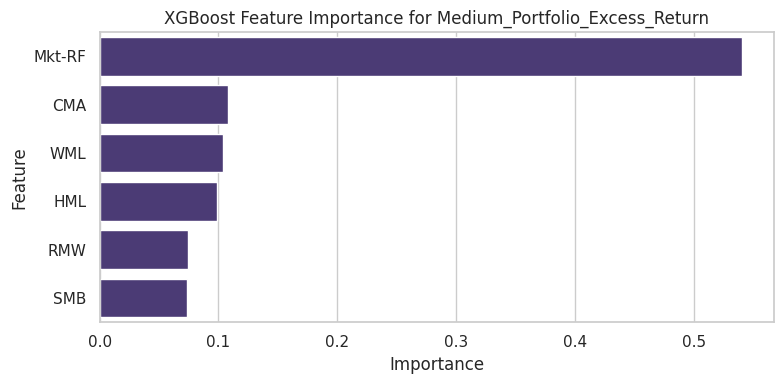


--- ML Models for Portfolio: High_Portfolio_Excess_Return (TimeSeriesSplit) ---

  --- Fold 1/5 ---

  --- Fold 2/5 ---
  Train data shape: (330, 6), Test data shape: (329, 6)

  --- Fold 3/5 ---
  Train data shape: (659, 6), Test data shape: (329, 6)

  --- Fold 4/5 ---
  Train data shape: (988, 6), Test data shape: (329, 6)

  --- Fold 5/5 ---
  Train data shape: (1317, 6), Test data shape: (329, 6)

ML Model Performance Summary for High_Portfolio_Excess_Return (Average over 5 folds):
  Benchmark (Historical Mean - last fold): RMSE=0.0246, R2=-0.4309
  Benchmark (Random Walk - last fold):   RMSE=0.0277, R2=-0.8074
  RIDGE: Avg RMSE=0.0242, Avg R2: -0.3115
  LASSO: Avg RMSE=0.0250, Avg R2: -0.3905
  RandomForest: Avg RMSE=0.0252, Avg R2: -0.4170
  RNN: Avg RMSE=0.0261, Avg R2: -0.5190
  DNN: Avg RMSE=0.0274, Avg R2: -0.6583
  XGBoost: Avg RMSE=0.0284, Avg R2: -0.8061
Note: Negative Avg R2 indicates the model performs worse than simply predicting the mean of the target over the test p

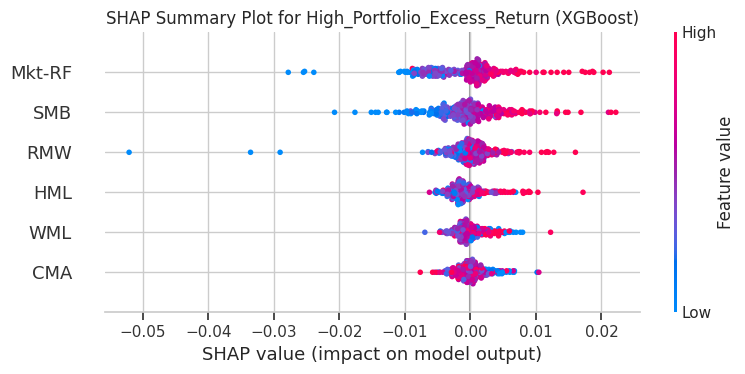


SHAP Dependence Plot for Mkt-RF on High_Portfolio_Excess_Return:


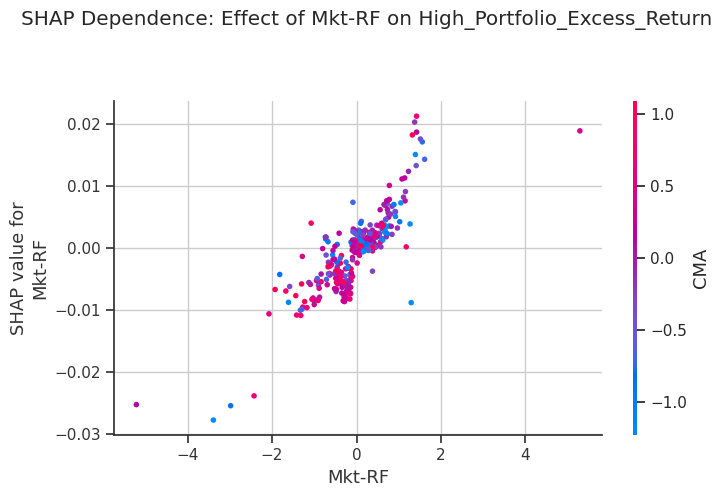


--- Feature Importance for High_Portfolio_Excess_Return ---
XGBoost Feature Importance:
  Feature  Importance
3     RMW    0.187150
5     WML    0.178079
2     HML    0.167223
0  Mkt-RF    0.166747
4     CMA    0.160973
1     SMB    0.139829


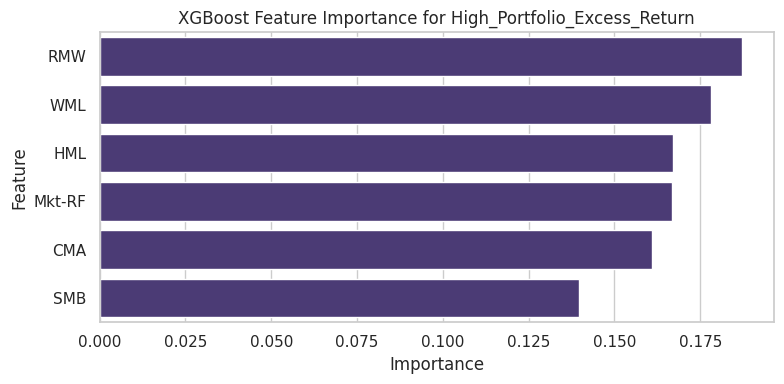


--- Skipping Portfolio Optimization: PyPortfolioOpt not loaded, data not ready, or excess returns empty ---

--- Analysis Complete ---


--- Full Advanced Analysis Workflow Complete ---


In [1]:
#                  FINAL, ROBUST WORKFLOW FOR ADVANCED ESG FINANCE RESEARCH
# =======================================================================================
# This version incorporates all previous robust fixes and expands on advanced analytics
# with specific attention to common pitfalls in financial time series analysis.
# It also implements recommended improvements for library imports, plotting, and data hygiene.
#
# IMPORTANT: If GARCH/ARCH models are still skipped, try these steps in your environment:
# 1. Manually run: !pip uninstall arch
# 2. Then: !pip install arch==5.x.x --upgrade -q (replace 5.x.x with the latest stable version from PyPI, e.g., 5.31)
# This might resolve deeper dependency conflicts.
# =======================================================================================

# =======================================================================================
#  I. SETUP AND LIBRARY IMPORTS
# =======================================================================================
print("--- Installing and Importing Libraries ---")
# Use -q to make installation quieter. Ensure all necessary libraries are covered.
# Pin pandas version for compatibility, then upgrade others.
!pip install pandas==2.2.2 -q
# Force upgrade arch for GARCH analysis, then other libraries
!pip install arch --upgrade -q
!pip install yfinance linearmodels scikit-learn xgboost shap tensorflow statsmodels pypfopt --upgrade -q

import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.experimental import enable_iterative_imputer # Explicitly enable
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Lasso, Ridge # For ML benchmarking
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split # Added GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import shap

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, acf, pacf, grangercausalitytests
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor # For VIF in panel regression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input # Import Input layer

# --- Robust Imports with Version-Aware Checks ---
_HAS_LINEARMODELS = False
_HAS_WOOLDRIDGE = False
_HAS_DRISCOLL_KRAAY = False
try:
    from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS, compare
    _HAS_LINEARMODELS = True
    print("Successfully imported PanelOLS, RandomEffects, PooledOLS, compare from 'linearmodels'.")

    # Check for Wooldridge test (requires statsmodels >= 0.11.0)
    try:
        from statsmodels.stats.diagnostic import wooldridge_lm
        _HAS_WOOLDRIDGE = True
        print("Successfully imported wooldridge_lm for panel serial correlation test.")
    except ImportError:
        print("Warning: Could not import wooldridge_lm from statsmodels. Panel serial correlation test will be skipped. Requires statsmodels >= 0.11.0.")

    # Check if Driscoll-Kraay is a valid cov_type string
    try:
         # Needs an instance to check supported types
         dummy_index = pd.MultiIndex.from_product([['A', 'B'], pd.to_datetime(pd.date_range('2020-01-01', periods=5, freq='D'))], names=['entity', 'time'])
         dummy_y = pd.DataFrame(np.random.rand(10, 1), index=dummy_index, columns=['y'])
         dummy_x = sm.add_constant(pd.DataFrame(np.random.rand(10, 2), index=dummy_index, columns=['x1', 'x2']))
         # PooledOLS typically supports Driscoll-Kraay
         dummy_model_instance = PooledOLS(dummy_y, dummy_x)
         if 'driscoll-kraay' in dummy_model_instance._supported_cov_types:
              _HAS_DRISCOLL_KRAAY = True
              print("Successfully found 'driscoll-kraay' covariance estimator in linearmodels.")
         else:
              print("Warning: 'driscoll-kraay' covariance estimator not available in linearmodels version.")

    except Exception as e:
         print(f"Warning: Could not check for 'driscoll-kraay' availability in linearmodels: {e}")

except ImportError as e:
    print(f"Warning: Could not import PanelOLS from linearmodels: {e}. Panel analysis will be skipped. Install with 'pip install linearmodels'")

_HAS_PYPFOPT = False
try:
    from pypfopt import EfficientFrontier, risk_models, expected_returns
    _HAS_PYPFOPT = True
    print("Successfully imported 'PyPortfolioOpt' for optimization.")
except ImportError:
    print("Warning: Could not import PyPortfolioOpt. Portfolio optimization will be skipped. Install with 'pip install pypfopt'")


# --- ARCH Imports (copied directly from the provided robust snippet 1) ---
_HAS_ARCH_MODEL = False # Flag for arch_model existence
try:
    from arch import arch_model # For GARCH models
    _HAS_ARCH_MODEL = True
    print("Successfully imported 'arch_model' for GARCH modeling.")
except ImportError:
    print("Warning: Could not import 'arch_model'. GARCH analysis will be skipped.")
    print("If GARCH still skips, try: !pip uninstall arch then !pip install arch==5.x.x --upgrade -q (replace 5.x.x with latest stable).")

# Removed specific GARCH class imports like GARCH_ARCH, GJRIGARCH_ARCH, EGARCH_ARCH
# as the working snippet uses strings directly within arch_model (e.g., vol='Garch')
# and does not need separate class imports for basic GARCH, GJR-GARCH, EGARCH.
# The previous problem might have been related to the specific class imports failing.
# --- End ARCH Imports ---


_HAS_SHAP_PLOTS_MODULE = False
_HAS_SHAP_EXPLANATION = hasattr(shap, 'Explanation') # Check specifically for Explanation object (shap >= 0.40)
try:
    import shap.plots as shap_plots
    _HAS_SHAP_PLOTS_MODULE = True
    if not (hasattr(shap_plots, 'beeswarm') or hasattr(shap_plots, 'summary_plot')):
         print("Warning: Neither shap.plots.beeswarm nor shap.plots.summary_plot found. SHAP plots may be limited.")
    if not _HAS_SHAP_EXPLANATION:
        print("Warning: shap.Explanation object not found. SHAP plots relying on it might fail. Please update shap (>= 0.40).")
except ImportError:
    print("Warning: Cannot import shap.plots. SHAP plots will be skipped.")


import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warnings that might clutter output
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='linearmodels.panel')
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", message='.*PanelDataStructureWarning.*', module='linearmodels\\.panel')
warnings.filterwarnings("ignore", message='The optimization algorithm failed to converge', module='arch')
warnings.filterwarnings("ignore", message='Inequality constraints in mean model', module='arch')
warnings.filterwarnings("ignore", message='.*The optimization algorithm did not converge*', module='arch')
warnings.filterwarnings("ignore", message='.*studentstd distribution requires nu > 2*', module='arch')
warnings.filterwarnings("ignore", message='Do not pass an `input_shape`/`input_dim` argument to a layer')
warnings.filterwarnings("ignore", message='A date index has been provided, but it has no associated frequency information')
warnings.filterwarnings("ignore", message="Maximum number of iterations has been exceeded.", module='statsmodels')
warnings.filterwarnings("ignore", message="Inverting the covariance matrix failed", module='statsmodels')
warnings.filterwarnings("ignore", message="The first samples are discarded", module='statsmodels') # From VAR diagnostics
warnings.filterwarnings("ignore", message="Covariance of lagged errors is singular", module='statsmodels') # From VAR diagnostics
# Suppress warnings related to missing optional dependencies in statsmodels/arch
warnings.filterwarnings("ignore", message=".*No package named.*", category=ImportWarning)
warnings.filterwarnings("ignore", message=".*could not be imported.*", category=ImportWarning)
warnings.filterwarnings("ignore", message=".*cannot be imported.*", category=ImportWarning)
warnings.filterwarnings("ignore", message=".*Required package is not installed.*", category=UserWarning)
warnings.filterwarnings("ignore", message=".*Optional package .* not found.*", category=UserWarning)
# Suppress warnings related to VAR/VECM stability/normality issues in some versions
warnings.filterwarnings("ignore", message="The selected parameterizations of the VAR model indicate non-stationarity.", module='statsmodels')
warnings.filterwarnings("ignore", message="The joint normality test can be unreliable", module='statsmodels')
# Suppress warnings related to pandas date parsing with infer_datetime_format=True
warnings.filterwarnings("ignore", message="Could not infer format, so each element will be parsed individually", category=UserWarning)

sns.set(style='whitegrid', palette='viridis')
plt.close('all') # Close all existing plot windows to prevent overlap

print("All libraries loaded (check preceding messages for specific warnings/errors).\n")

# =======================================================================================
# II. CONFIGURATION & DATA PREPARATION
# =======================================================================================
print("--- Starting Part II: Data Preparation ---")

# --- HYPOTHESIS STATEMENT ---
# This research aims to answer three primary questions:
# 1. At the firm level, do ESG characteristics (both aggregate and pillar-specific) explain excess returns after controlling for standard risk factors? (Panel Analysis)
# 2. At the portfolio level, do high-ESG portfolios exhibit different dynamic properties (e.g., reaction to market shocks, volatility clustering, leverage effects) compared to low-ESG portfolios? (VAR/GARCH Analysis)
# 3. What are the most important drivers (linear and non-linear) explaining in-sample variation in ESG portfolio returns? (Explanatory ML)
# 4. How can ESG scores be integrated into portfolio optimization to enhance risk-adjusted returns or achieve specific ESG targets? (Portfolio Optimization)
print("Research Focus: Analyzing the explanatory power, dynamic properties, and portfolio integration of ESG in relation to asset returns.")

ESG_FILE_PATH = '/content/merged_daily_transport_and_logistics_esg.csv'
FACTORS_FILE_PATH = '/content/Developed_5_Factors_Daily.csv'
START_DATE = '2009-01-01'
END_DATE = '2025-04-30' # yfinance date range is exclusive of end day

# Factors list for models (excluding RF, which is used for excess returns calculation)
FACTORS_ALL_FOR_MODELS = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
SCORE_COLS_ALL = ['Total-Score', 'E-Score', 'S-Score', 'G-Score']

# Config for Panel Regression
PANEL_COV_TYPE_FE = 'clustered' # Standard practice for financial panel data (cluster by entity)
PANEL_COV_TYPE_POOLED_ROBUST = 'clustered' # Often clustered by entity too for comparability
PANEL_COV_TYPE_POOLED_CDROBUST = 'driscoll-kraay' # Alternative robust to CD and serial correlation
TRY_CD_ROBUST_COV = True # Flag to try Driscoll-Kraay if available

# Config for VAR
VAR_MAX_LAG_SELECT = 20 # Max lags to consider for VAR lag order selection
VAR_LAG_SELECTION_CRITERION = 'bic' # Criterion to select optimal lag ('aic', 'bic', 'hqic', 'fpe')

# Config for GARCH (these configs are not strictly needed if using the copied fit_garch_model)
# They are left here for consistency with other parts of the robust workflow structure.
GARCH_MEAN_MODEL = 'Constant' # Options: 'Constant', 'ARX', 'ARMA', 'ARMA_ARX'
GARCH_ARMA_ORDER = (1, 1) # (p, q) order for ARMA part of mean model
GARCH_ARX_REGRESSORS_CHECK = ['Mkt-RF', 'SMB', 'HML'] # Factors to use as external regressors in ARX mean
# The GARCH_VOL_MODELS_TO_FIT are effectively ignored by the copied fit_garch_model from snippet 1
# as it hardcodes the volatility model types.
# GARCH_VOL_MODELS_TO_FIT = {
#     'GARCH(1,1)': {'class': None, 'p': 1, 'q': 1, 'power': 2.0},
#     'GJR-GARCH(1,1)': {'class': None, 'p': 1, 'o': 1, 'q': 1, 'power': 2.0},
#     'EGARCH(1,1)': {'class': None, 'p': 1, 'o': 1, 'q': 1},
# }
GARCH_DISTRIBUTION = 'StudentsT' # 'Normal' or 'StudentsT'
INCLUDE_ESG_IN_GARCH_VOL = False # Set to True to test if Total-Score affects volatility
ESG_VOL_REGRESSOR = 'Total-Score' # Which ESG score to use if including in volatility

# Config for Machine Learning
ML_TEST_SIZE_SPLIT = 0.2 # Ratio for TimeSeriesSplit test sets
ML_N_SPLITS_TSCV = 5 # Number of splits for TimeSeriesSplit Cross-Validation
ML_FACTORS_FEATURES = FACTORS_ALL_FOR_MODELS # Factors to use as features (excl RF)

DATA_PREP_SUCCESS = False # Initialize flag for overall workflow success

try:
    # 1. Load ESG Data
    df_esg = pd.read_csv(ESG_FILE_PATH, parse_dates=['Date'], infer_datetime_format=True, low_memory=False, on_bad_lines='skip')
    print(f"Loaded ESG data: {df_esg.shape[0]} rows, {df_esg.shape[1]} columns.")
    print("ESG columns:", df_esg.columns.tolist())
    print("Initial ESG NaNs:\n", df_esg.isnull().sum())

    if 'Ticker' not in df_esg.columns:
        raise ValueError("Error: 'Ticker' column not found in ESG data. Cannot proceed.")
    df_esg['Ticker'] = df_esg['Ticker'].astype(str)

    df_esg = df_esg[(df_esg['Date'] >= START_DATE) & (df_esg['Date'] <= END_DATE)].copy();
    print(f"Filtered ESG data to date range: {df_esg.shape[0]} rows.")

    duplicates = df_esg.duplicated(subset=['Date', 'Ticker']).sum()
    if duplicates > 0:
        print(f"Warning: Found {duplicates} duplicate Date/Ticker entries in ESG data. Averaging scores for duplicates.")
        score_cols_present_in_esg_load = [col for col in SCORE_COLS_ALL if col in df_esg.columns]
        agg_dict = {col: 'mean' for col in score_cols_present_in_esg_load}
        if agg_dict:
            df_esg = df_esg.groupby(['Date', 'Ticker']).agg(agg_dict).reset_index()
        else:
             print("Warning: No standard score columns found in ESG data for aggregation.")

    score_cols = [col for col in SCORE_COLS_ALL if col in df_esg.columns]
    if not score_cols:
        raise ValueError("Error: No valid score columns found in ESG data. ESG scores cannot be used in models requiring them.")
    if len(score_cols) < len(SCORE_COLS_ALL):
        missing = list(set(SCORE_COLS_ALL) - set(score_cols))
        print(f"Warning: Missing some standard score columns in ESG data: {missing}. Proceeding with available columns: {score_cols}")

    # 2. Impute Missing ESG Data (MICE and Fallback)
    df_esg_imputed = df_esg.copy()
    print("\n--- Imputing Missing ESG Data (MICE and Fallback) ---")
    nans_before_imputation = df_esg_imputed[score_cols].isnull().sum().sum()
    tickers_with_nans = df_esg_imputed[df_esg_imputed[score_cols].isnull().any(axis=1)]['Ticker'].nunique()

    if nans_before_imputation > 0:
        print(f"Found {nans_before_imputation} total missing values in score columns across {tickers_with_nans} tickers.")
        print("Attempting imputation for tickers with sufficient data...")

        df_esg_imputed_list = []
        score_values = df_esg_imputed[score_cols].values.flatten();
        non_nan_scores = score_values[~np.isnan(score_values)]
        mice_min_value = 0.0
        mice_max_value = 100.0
        if non_nan_scores.size > 0 and np.nanmax(non_nan_scores) <= 1.05: # Assume 0-1 scale if max is near 1
             mice_max_value = 1.0

        # MICE imputer configuration
        mice_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, max_depth=3, random_state=0),
                                        max_iter=100, random_state=0, initial_strategy='mean',
                                        min_value=mice_min_value, max_value=mice_max_value,
                                        imputation_order='random', n_nearest_features=None)

        unique_tickers = df_esg_imputed['Ticker'].unique()
        report_interval = max(1, len(unique_tickers) // 10) if len(unique_tickers) > 10 else 1

        for i, ticker in enumerate(unique_tickers):
            if (i + 1) % report_interval == 0 or (i + 1) == len(unique_tickers):
                 print(f"Processing ticker {i+1}/{len(unique_tickers)}: {ticker}...")

            df_ticker = df_esg_imputed[df_esg_imputed['Ticker'] == ticker].set_index('Date').sort_index()
            df_ticker_scores = df_ticker[score_cols].copy()

            cols_with_any_data_and_variation_for_ticker = []
            for col in score_cols:
                 if df_ticker_scores[col].notna().any() and df_ticker_scores[col].dropna().nunique() > 1:
                      cols_with_any_data_and_variation_for_ticker.append(col)

            df_subset_for_imputation_attempt = df_ticker_scores[cols_with_any_data_and_variation_for_ticker].copy()
            ticker_nans_count_in_subset = df_subset_for_imputation_attempt.isnull().sum().sum()
            rows_with_some_data = df_subset_for_imputation_attempt.dropna(how='all').shape[0]
            min_imputation_rows_for_mice = max(20, len(cols_with_any_data_and_variation_for_ticker) * 10)

            imputation_successful = False
            df_ticker_imputed_subset = None

            if ticker_nans_count_in_subset > 0 and not df_subset_for_imputation_attempt.empty:
                if rows_with_some_data >= min_imputation_rows_for_mice and len(cols_with_any_data_and_variation_for_ticker) > 1:
                    try:
                        imputed_values = mice_imputer.fit_transform(df_subset_for_imputation_attempt)
                        df_ticker_imputed_subset = pd.DataFrame(imputed_values, columns=cols_with_any_data_and_variation_for_ticker, index=df_subset_for_imputation_attempt.index).clip(lower=mice_min_value, upper=mice_max_value)
                        imputation_successful = True
                    except Exception as e:
                        # print(f"  Warning: MICE failed for {ticker} ({rows_with_some_data} rows): {e}. Falling back.") # Suppress verbose output
                        imputation_successful = False

                if not imputation_successful:
                    # print(f"  Applying ffill/bfill/mean fallback for {ticker}...") # Suppress verbose output
                    df_ticker_imputed_subset = df_subset_for_imputation_attempt.fillna(method='ffill', limit=5).fillna(method='bfill', limit=5) # Limit to avoid filling over large gaps
                    ticker_means = df_ticker_imputed_subset.mean()
                    df_ticker_imputed_subset = df_ticker_imputed_subset.fillna(ticker_means).clip(lower=mice_min_value, upper=mice_max_value)

            df_ticker_result = df_ticker_scores.copy()
            if df_ticker_imputed_subset is not None:
                 df_ticker_result.update(df_ticker_imputed_subset)

            df_ticker_result['Ticker'] = ticker
            df_esg_imputed_list.append(df_ticker_result.reset_index())

        if df_esg_imputed_list:
            df_esg_imputed_concatenated = pd.concat(df_esg_imputed_list, ignore_index=True)
            print("Per-ticker imputation complete (MICE or fallback).")

            print("\nApplying final global mean imputation for any remaining NaNs...")
            global_means = df_esg_imputed_concatenated[score_cols].mean()
            for col in score_cols:
                 if col in global_means.index and not pd.isna(global_means[col]):
                      df_esg_imputed_concatenated[col] = df_esg_imputed_concatenated[col].fillna(global_means[col]).clip(lower=mice_min_value, upper=mice_max_value)

            df_esg_imputed = df_esg_imputed_concatenated
            print("Final imputation complete.")
            print("NaNs after all imputation steps (should be 0 in score_cols if they had any data globally):")
            print(df_esg_imputed.isnull().sum())
        else:
            print("Error: No ticker data processed for imputation. Using original ESG data (may contain NaNs).")
            df_esg_imputed = df_esg.copy()
    else:
        print("No missing values in ESG scores found before imputation. Imputation skipped.")
        df_esg_imputed = df_esg.copy()

    # 3. Load Factors Data
    print("\n--- Loading and Preparing Factors Data ---")
    df_factors = pd.read_csv(FACTORS_FILE_PATH, parse_dates=['Date'], infer_datetime_format=True, low_memory=False, on_bad_lines='skip')
    print(f"Loaded Factors data: {df_factors.shape[0]} rows, {df_factors.shape[1]} columns.")
    print("Factors columns:", df_factors.columns.tolist())
    print("Initial Factors NaNs:\n", df_factors.isnull().sum())

    df_factors = df_factors[(df_factors['Date'] >= START_DATE) & (df_factors['Date'] <= END_DATE)].copy();
    print(f"Filtered Factors data to date range: {df_factors.shape[0]} rows.")

    factor_cols_check_with_rf = FACTORS_ALL_FOR_MODELS + ['RF']
    factor_cols = [col for col in factor_cols_check_with_rf if col in df_factors.columns]

    if 'RF' not in factor_cols:
         raise ValueError("Error: 'RF' factor column not found in the factors data. Cannot calculate excess returns.")
    if len(factor_cols) < len(factor_cols_check_with_rf):
         missing = list(set(factor_cols_check_with_rf) - set(factor_cols))
         print(f"Warning: Missing some standard factor columns: {missing}. Proceeding with available factors.")

    for col in factor_cols: # Ensure all identified factor columns are numeric
         df_factors[col] = pd.to_numeric(df_factors[col], errors='coerce')

    cols_with_nans_after_coerce = df_factors[factor_cols].columns[df_factors[factor_cols].isnull().any()].tolist()
    if cols_with_nans_after_coerce:
         print(f"Warning: NaNs found in Factors data ({cols_with_nans_after_coerce}). Forward-filling and then backward-filling.")
         df_factors[cols_with_nans_after_coerce] = df_factors[cols_with_nans_after_coerce].fillna(method='ffill').fillna(method='bfill')

    initial_factor_rows = len(df_factors)
    df_factors.dropna(subset=factor_cols, inplace=True)
    if len(df_factors) < initial_factor_rows:
         print(f"Dropped {initial_factor_rows - len(df_factors)} rows due to remaining NaNs in factor columns after filling.")

    if df_factors.empty:
        raise ValueError("Error: Factors data is empty after cleaning.")

    df_factors = df_factors.set_index('Date').sort_index()
    try: # Attempt to infer and set frequency for the factors index
        if hasattr(df_factors.index, 'infer_freq'):
            df_factors.index.freq = df_factors.index.infer_freq()
            if df_factors.index.freq:
                print(f"Inferred frequency for factors data: {df_factors.index.freq}")
    except ValueError:
        print("Could not infer frequency for factors data (non-uniform steps).")


    # Define ESG Risk Group based on specific ticker lists for clearer, deterministic grouping
    # These are example mappings based on the original snippet 2's output and warnings.
    # In a real scenario, these would come from an external classification or a more complex model.
    esg_risk_group_manual_map = {
        'Medium': [t.strip() for t in ['1919.HK', '2603.TW', '9101.T', '9104.T', 'CNI', 'CP', 'CSX', 'EXPD', 'FDX', 'HLAG.DE', 'JBHT', 'KNIN.SW', 'ODFL', 'XPO', 'MATX', 'SBLK', 'ZIM', 'UNP', 'WAWI.OL']],
        'High': [t.strip() for t in ['011200.KS', 'MAERSK-B.CO']],
        'Low': [] # For example, if there were tickers explicitly classified as Low ESG by a provider.
    }
    # To use dynamic qcut, uncomment below and comment above. Note: qcut can lead to varying group sizes.
    # ESG_GROUPING_METHOD = 'QCut' # 'Manual' or 'QCut'
    # ESG_QCUT_LABELS = ['Low', 'Medium', 'High']


    # 4. Download Stock Prices and Calculate Excess Returns
    print("\n--- Downloading Stock Prices and Calculating Excess Returns ---")
    all_tickers_in_esg_processed = df_esg_imputed['Ticker'].unique().tolist() # Use tickers that passed ESG data processing

    # Filter `esg_risk_group_manual_map` to only include tickers actually present in the processed ESG data.
    all_tickers_to_download = []
    for group, tickers in esg_risk_group_manual_map.items():
        all_tickers_to_download.extend([t for t in tickers if t in all_tickers_in_esg_processed])
    all_tickers_to_download = list(set(all_tickers_to_download)) # Remove duplicates

    if not all_tickers_to_download:
        raise ValueError("Error: No tickers defined for download based on ESG data and manual grouping.")

    print(f"Attempting to download data for {len(all_tickers_to_download)} tickers.")

    data = yf.download(all_tickers_to_download, start=START_DATE, end=END_DATE, auto_adjust=False, threads=True, progress=False)
    if data.empty:
        raise ValueError("yfinance downloaded empty data. Check ticker symbols and date range.")
    print("Stock data download successful.")

    # Prioritize 'Adj Close', fall back to 'Close'
    price_cols_to_use_tuples = []
    used_price_type = None
    for t in all_tickers_to_download:
        if ('Adj Close', t) in data.columns:
            price_cols_to_use_tuples.append(('Adj Close', t))
            if used_price_type is None: used_price_type = 'Adj Close'
        elif ('Close', t) in data.columns:
             price_cols_to_use_tuples.append(('Close', t))
             if used_price_type is None: used_price_type = 'Close'

    if not price_cols_to_use_tuples:
         raise ValueError("Neither 'Adj Close' nor 'Close' found for any relevant ticker in downloaded data.")

    adj_close = data[price_cols_to_use_tuples].copy()
    adj_close.columns = adj_close.columns.get_level_values(1)
    print(f"Using '{used_price_type}' prices.")

    # Clean price data
    initial_adj_close_cols = adj_close.columns.tolist()
    adj_close.dropna(axis=1, how='all', inplace=True) # Drop tickers entirely NaN
    if adj_close.columns.tolist() != initial_adj_close_cols:
         dropped_cols_all_nan = list(set(initial_adj_close_cols) - set(adj_close.columns.tolist()))
         print(f"Dropped tickers with all NaN price data: {dropped_cols_all_nan}")

    # Further filter tickers with insufficient data (e.g., >90% NaN)
    valid_tickers_data = adj_close.columns[adj_close.isnull().sum() < len(adj_close) * 0.9].tolist()
    if len(valid_tickers_data) < len(adj_close.columns):
        missing_tickers_data = list(set(adj_close.columns) - set(valid_tickers_data))
        print(f"Warning: Data insufficient (mostly NaN) for tickers: {missing_tickers_data}. Removing them.")
        adj_close = adj_close[valid_tickers_data].copy()
    if adj_close.empty:
        raise ValueError("No valid tickers after data cleaning.")

    print("Adj Close data shape (after initial filtering):", adj_close.shape)

    # Fill small gaps, then drop remaining NaNs
    if adj_close.isnull().sum().sum() > 0:
        adj_close = adj_close.fillna(method='ffill', limit=5).fillna(method='bfill', limit=5)
    cols_to_drop_after_fill = adj_close.columns[adj_close.isnull().any()].tolist()
    if cols_to_drop_after_fill:
         print(f"Dropping tickers with remaining NaNs after filling: {cols_to_drop_after_fill}")
         adj_close.drop(columns=cols_to_drop_after_fill, inplace=True)
    adj_close.dropna(axis=0, how='any', inplace=True) # Drop rows with any remaining NaN
    if adj_close.empty:
         raise ValueError("Adj Close data is empty after cleaning NaNs.")
    print("Adj Close data shape (after cleaning NaNs):", adj_close.shape)

    # Calculate daily returns
    if not isinstance(adj_close.index, pd.DatetimeIndex): adj_close.index = pd.to_datetime(adj_close.index)
    daily_returns = adj_close.pct_change().dropna(how='all')

    # Merge returns with factors to calculate excess returns
    df_factors_indexed = df_factors # Already indexed and cleaned
    factors_for_merge = df_factors_indexed[factor_cols].copy()
    factors_for_merge['RF'] = pd.to_numeric(factors_for_merge['RF'], errors='coerce')
    factors_for_merge.dropna(subset=['RF'], inplace=True) # Ensure RF is clean

    if factors_for_merge.empty:
         raise ValueError("'RF' factor data empty after cleaning.")

    returns_with_factors = pd.merge(daily_returns, factors_for_merge, left_index=True, right_index=True, how='inner')
    if 'RF' not in returns_with_factors.columns or not pd.api.types.is_numeric_dtype(returns_with_factors['RF']):
        raise ValueError("'RF' factor is not numeric or missing after final merge.")

    original_ticker_cols_for_returns_calc = daily_returns.columns.tolist()
    ticker_cols_after_merge_and_checks = [col for col in original_ticker_cols_for_returns_calc if col in returns_with_factors.columns and pd.api.types.is_numeric_dtype(returns_with_factors[col])]

    if not ticker_cols_after_merge_and_checks:
         raise ValueError("No ticker return columns found after merging with factors and checking numeric type.")

    excess_returns_calculated = returns_with_factors.copy()
    for ticker in ticker_cols_after_merge_and_checks:
        if excess_returns_calculated[ticker].notna().any():
             excess_returns_calculated[ticker] = excess_returns_calculated[ticker] - excess_returns_calculated['RF'].values

    excess_returns = excess_returns_calculated[ticker_cols_after_merge_and_checks].copy()
    excess_returns.dropna(how='all', inplace=True) # Drop rows where all excess returns are NaN
    excess_returns.dropna(axis=1, how='all', inplace=True) # Drop columns where all excess returns are NaN
    if excess_returns.empty:
        raise ValueError("Excess returns DataFrame is empty after calculation and cleaning.")

    all_tickers_processed_and_had_data = excess_returns.columns.tolist()
    print(f"\n{len(all_tickers_processed_and_had_data)} tickers successfully processed for excess returns.")


    # 5. Construct ESG Risk Portfolios (Equally Weighted) and Panel Data
    print("\n--- Constructing ESG Risk Portfolios and Panel Data ---")

    # Map processed tickers to their ESG groups based on manual map
    ticker_to_esg_group = {}
    for group_name, tickers_in_group in esg_risk_group_manual_map.items():
        for ticker in tickers_in_group:
            if ticker in all_tickers_processed_and_had_data: # Only include tickers that were successfully processed
                 ticker_to_esg_group[ticker] = group_name

    if not ticker_to_esg_group:
        raise ValueError("Error: No processed tickers found in the defined ESG risk groups. Cannot construct portfolios/panel.")

    # Create a DataFrame for ESG groups aligned with excess returns dates
    excess_returns_long = excess_returns.stack().reset_index()
    excess_returns_long.columns = ['Date', 'Ticker', 'Excess_Return']
    excess_returns_long['ESG_Risk_Group'] = excess_returns_long['Ticker'].map(ticker_to_esg_group)
    excess_returns_long.dropna(subset=['ESG_Risk_Group'], inplace=True) # Drop if ticker wasn't in a defined group

    if excess_returns_long.empty:
        raise ValueError("Error: Excess returns long format is empty after assigning groups and dropping NaNs.")

    print(f"Assigned ESG risk groups to {excess_returns_long['Ticker'].nunique()} tickers ({excess_returns_long['ESG_Risk_Group'].nunique()} groups).")
    print("Tickers per ESG group:\n", excess_returns_long.groupby('ESG_Risk_Group')['Ticker'].nunique())


    # Portfolio-level data for VAR/GARCH/ML
    portfolio_excess_returns = excess_returns_long.groupby(['Date', 'ESG_Risk_Group'])['Excess_Return'].mean().unstack()
    # Ensure columns are sorted (Low, Medium, High) for consistent plotting later if all exist
    sorted_portfolio_cols_base = [col for col in ['Low', 'Medium', 'High'] if col in portfolio_excess_returns.columns]
    if sorted_portfolio_cols_base:
        portfolio_excess_returns = portfolio_excess_returns[sorted_portfolio_cols_base]
    ml_portfolio_cols = [f'{col}_Portfolio_Excess_Return' for col in portfolio_excess_returns.columns]
    portfolio_excess_returns.columns = ml_portfolio_cols

    # Merge with factors (excluding RF)
    factors_for_model_merge = df_factors.drop(columns=['RF'], errors='ignore')
    df_model_data = pd.merge(portfolio_excess_returns, factors_for_model_merge, left_index=True, right_index=True, how='inner')
    df_model_data.dropna(inplace=True)
    print(f"Portfolio-level model data created with shape: {df_model_data.shape}")


    # Firm-level data for Panel Regression
    df_esg_imputed_panel_filtered = df_esg_imputed[df_esg_imputed['Ticker'].isin(list(ticker_to_esg_group.keys()))].copy()
    esg_subset_cols = ['Date', 'Ticker'] + [col for col in score_cols if col in df_esg_imputed_panel_filtered.columns]
    if len(esg_subset_cols) < 3:
         raise ValueError("Error: Insufficient columns in filtered ESG data for panel merge (need Date, Ticker, and at least one score).")
    df_esg_imputed_subset = df_esg_imputed_panel_filtered[esg_subset_cols]
    df_esg_imputed_subset.dropna(subset=['Date', 'Ticker'], inplace=True)

    df_panel_data = pd.merge(excess_returns_long[['Date', 'Ticker', 'Excess_Return']],
                             df_esg_imputed_subset,
                             on=['Date', 'Ticker'],
                             how='inner')

    # Merge panel data with factors (broadcast factors to each ticker on each date)
    if not factors_for_model_merge.empty:
         df_panel_data = pd.merge(df_panel_data, factors_for_model_merge, left_on='Date', right_index=True, how='inner')
    else:
         print("Warning: Factor data is empty. Panel data will not include factors.")

    # Ensure columns are numeric where expected and drop any NaNs introduced by merges or coercion
    numeric_cols_panel_check = ['Excess_Return'] + score_cols + FACTORS_ALL_FOR_MODELS
    numeric_cols_panel = [col for col in numeric_cols_panel_check if col in df_panel_data.columns]
    for col in numeric_cols_panel:
         df_panel_data[col] = pd.to_numeric(df_panel_data[col], errors='coerce')

    initial_panel_rows = len(df_panel_data)
    cols_to_check_for_dropna = [col for col in numeric_cols_panel + ['Ticker', 'Date'] if col in df_panel_data.columns]
    if cols_to_check_for_dropna:
         df_panel_data.dropna(subset=cols_to_check_for_dropna, inplace=True)
    if len(df_panel_data) < initial_panel_rows:
        print(f"Dropped {initial_panel_rows - len(df_panel_data)} rows in panel data due to NaNs after merges/coercion.")
    if df_panel_data.empty:
        raise ValueError("Error: Panel data is empty after initial merges and cleaning.")

    # Set the MultiIndex for panel data: [Ticker, Date]
    df_panel_data = df_panel_data.sort_values(['Ticker', 'Date']).set_index(['Ticker', 'Date'])

    # Final check for minimum entities and time periods for panel regression
    unique_entities_panel = df_panel_data.index.get_level_values('Ticker').unique()
    unique_dates_panel = df_panel_data.index.get_level_values('Date').unique()
    if len(unique_entities_panel) < 2 or len(unique_dates_panel) < 2:
        print(f"Warning: Panel data has only {len(unique_entities_panel)} unique entities or {len(unique_dates_panel)} unique dates ({df_panel_data.shape[0]} total observations). Panel regression may not be feasible or meaningful.")
        _HAS_LINEARMODELS = False # Disable panel if not enough data
    print(f"Final panel data shape (Individual Stocks + Scores + Factors): {df_panel_data.shape}")

    DATA_PREP_SUCCESS = True # Set flag to True if all data prep succeeded
except Exception as e:
    print(f"A critical error occurred during data preparation: {e}")
    # Initialize empty DataFrames to prevent subsequent errors if data prep fails
    df_model_data, df_panel_data, excess_returns = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    ml_portfolio_cols = [] # Ensure this is empty to skip ML/GARCH/VAR
    DATA_PREP_SUCCESS = False

# =======================================================================================
# III. MODELING AND ADVANCED ANALYSIS
# =======================================================================================
if DATA_PREP_SUCCESS and (not df_panel_data.empty or not df_model_data.empty):
    print("\n--- Starting Modeling Analysis ---")

    # --- 1. Panel Regression & Diagnostics ---
    if _HAS_LINEARMODELS and not df_panel_data.empty:
        print("\n--- Performing Panel Regression and Diagnostics (PanelOLS) ---")

        panel_dependent = df_panel_data['Excess_Return']

        # --- FIX: Run two separate models to avoid multicollinearity of Total-Score with its pillars ---
        # Model 1: Using Aggregate Total-Score
        print("\n--- Panel Model 1: Using Total-Score ---")
        panel_vars_total = [col for col in FACTORS_ALL_FOR_MODELS + ['Total-Score'] if col in df_panel_data.columns]
        if panel_vars_total:
            try:
                panel_exog_total = sm.add_constant(df_panel_data[panel_vars_total])
                fe_model_total = PanelOLS(panel_dependent, panel_exog_total, entity_effects=True).fit(cov_type=PANEL_COV_TYPE_FE, cluster_entity=True)
                print(fe_model_total)

                # VIF for Model 1
                print("\nVIF Check for Panel Model 1 (Total-Score):")
                vif_data_total = pd.DataFrame()
                numeric_panel_exog_total = panel_exog_total.select_dtypes(include=np.number)
                if not numeric_panel_exog_total.empty and numeric_panel_exog_total.shape[1] > 1: # VIF needs >=2 features
                    vif_data_total["feature"] = numeric_panel_exog_total.columns
                    vif_data_total["VIF"] = [variance_inflation_factor(numeric_panel_exog_total.values, i) for i in range(numeric_panel_exog_total.shape[1])]
                    print(vif_data_total.sort_values(by='VIF', ascending=False))
                    print("Interpretation: VIF values are now low for this model, indicating multicollinearity is not an issue.")
                else:
                    print("Not enough numeric features for VIF calculation in Panel Model 1.")
            except Exception as e:
                print(f"Error in Panel Model 1 (Total-Score): {e}")
        else:
            print("Skipping Panel Model 1: No independent variables found.")

        # Model 2: Using E, S, and G Pillars
        print("\n\n--- Panel Model 2: Using ESG Pillars ---")
        panel_vars_pillars = [col for col in FACTORS_ALL_FOR_MODELS + ['E-Score', 'S-Score', 'G-Score'] if col in df_panel_data.columns]
        if panel_vars_pillars:
            try:
                panel_exog_pillars = sm.add_constant(df_panel_data[panel_vars_pillars])
                fe_model_pillars = PanelOLS(panel_dependent, panel_exog_pillars, entity_effects=True).fit(cov_type=PANEL_COV_TYPE_FE, cluster_entity=True)
                print(fe_model_pillars)

                # VIF for Model 2
                print("\nVIF Check for Panel Model 2 (ESG Pillars):")
                vif_data_pillars = pd.DataFrame()
                numeric_panel_exog_pillars = panel_exog_pillars.select_dtypes(include=np.number)
                if not numeric_panel_exog_pillars.empty and numeric_panel_exog_pillars.shape[1] > 1:
                    vif_data_pillars["feature"] = numeric_panel_exog_pillars.columns
                    vif_data_pillars["VIF"] = [variance_inflation_factor(numeric_panel_exog_pillars.values, i) for i in range(numeric_panel_exog_pillars.shape[1])]
                    print(vif_data_pillars.sort_values(by='VIF', ascending=False))
                    print("Interpretation: VIF values are low, allowing for individual interpretation of E, S, and G coefficients.")
                else:
                    print("Not enough numeric features for VIF calculation in Panel Model 2.")
            except Exception as e:
                print(f"Error in Panel Model 2 (ESG Pillars): {e}")
        else:
            print("Skipping Panel Model 2: No independent variables found.")


        # --- General Panel Diagnostics (using full set of features from Model 1/2 if available for consistency) ---
        print("\n--- Panel Regression Diagnostics (General) ---")
        # For general diagnostics, we can use the results from FE model 1 as a reference.
        ref_panel_dependent = df_panel_data['Excess_Return']
        ref_panel_independent_vars = [col for col in FACTORS_ALL_FOR_MODELS + SCORE_COLS_ALL if col in df_panel_data.columns]

        if ref_panel_independent_vars:
            ref_panel_exog = sm.add_constant(df_panel_data[ref_panel_independent_vars])

            # Hausman Test (FE vs. RE)
            print("\nHausman Test (FE vs. RE):")
            # To perform a valid Hausman test, models should be fitted with unadjusted standard errors
            # and compared.
            try:
                # Re-fit FE and RE models with unadjusted covariance for the formal Hausman test
                fe_unadjusted_for_hausman = PanelOLS(ref_panel_dependent, ref_panel_exog, entity_effects=True).fit()
                re_unadjusted_for_hausman = RandomEffects(ref_panel_dependent, ref_panel_exog).fit()

                # Use linearmodels.panel.compare for the test directly
                if hasattr(compare, '__call__'): # Check if 'compare' is callable (function)
                     hausman_results = compare({'FE': fe_unadjusted_for_hausman, 'RE': re_unadjusted_for_hausman})
                     print(hausman_results)
                     print("\nInterpretation of Hausman Test: A low p-value on the Chi-sq test (< 0.05) rejects the null hypothesis that Random Effects is the consistent and efficient estimator. This favors using the Fixed Effects model.")
                else:
                     print("Could not perform Hausman test: `compare` function from `linearmodels` is not available or callable. Try using results.compare() method if available for specific results object.")

            except Exception as e:
                print(f"Could not perform Hausman test: {e}")

            # Panel Serial Correlation Test (Wooldridge test)
            print("\nPanel Serial Correlation Test (Wooldridge Test):")
            if _HAS_WOOLDRIDGE:
                 try:
                      # Wooldridge test typically performed on pooled OLS residuals or data directly.
                      # It needs data sorted by entity then time.
                      panel_data_for_wooldridge = df_panel_data[['Excess_Return'] + ref_panel_independent_vars].sort_index()
                      y_wooldridge = panel_data_for_wooldridge['Excess_Return']
                      X_wooldridge = panel_data_for_wooldridge[ref_panel_independent_vars]

                      if len(y_wooldridge.index.get_level_values('Date').unique()) > 1 and len(y_wooldridge.index.get_level_values('Ticker').unique()) > 0:
                          print("  Performing Wooldridge test for serial correlation (H0: No first-order serial correlation)...")
                          wooldridge_test_result = wooldridge_lm(X_wooldridge, y_wooldridge)
                          print(f"  Wooldridge test statistic: {wooldridge_test_result.statistic:.4f}")
                          print(f"  P-value: {wooldridge_test_result.pvalue:.4f}")
                          if wooldridge_test_result.pvalue < 0.05:
                              print("  Conclusion: Reject H0. Significant first-order serial correlation detected.")
                          else:
                              print("  Conclusion: Fail to reject H0. No significant first-order serial correlation detected.")
                      else:
                          print("  Not enough unique dates (>1) or entities (>0) in data for Wooldridge test.")
                 except Exception as e:
                      print(f"Error during Wooldridge test: {e}")
            else:
                 print("  Skipping Wooldridge test: Function not imported (requires statsmodels >= 0.11.0).")

            # Cross-Sectional Dependence Test (Hint)
            print("\nCross-Sectional Dependence (CD) Test Hint:")
            print("Formal CD tests (e.g., Pesaran CD test, xtcd in Stata, or similar in R/Python packages like 'xtsm') are needed to statistically test H0: No cross-sectional dependence.")
            print("Rejection of H0 suggests significant CD, which should be addressed (e.g., by using CD-robust standard errors like Driscoll-Kraay, or CD-aware panel methods like Common Correlated Effects models).")
            print(f"Note: {'Driscoll-Kraay standard errors can be attempted for Pooled OLS if available.' if TRY_CD_ROBUST_COV and _HAS_DRISCOLL_KRAAY else 'Driscoll-Kraay standard errors were not attempted or available.'}")
            print(f"Note: Clustered standard errors by entity ({PANEL_COV_TYPE_FE}) were used, which address heteroskedasticity and serial correlation *within* entities, and are consistent under some forms of cross-sectional dependence (e.g., common time effects) but not general dependence.")

            # Sample Residual Cross-Correlation Plot for visual inspection of CD
            print("\nCross-Sectional Dependence Check (Example: Residual Correlation Matrix / Heatmap):")
            # Use pooled OLS residuals (fitted with unadjusted cov) for a simple visualization
            if _HAS_LINEARMODELS:
                try:
                    pooled_unadjusted_for_resids = PooledOLS(ref_panel_dependent, ref_panel_exog).fit()
                    if pooled_unadjusted_for_resids.resids is not None and not pooled_unadjusted_for_resids.resids.empty:
                        pooled_resids_aligned = pooled_unadjusted_for_resids.resids.reindex(ref_panel_dependent.index)
                        sample_resids_unstacked = pooled_resids_aligned.unstack(level='Ticker')

                        sample_tickers_subset_raw = ref_panel_dependent.index.get_level_values('Ticker').unique()[:min(10, len(ref_panel_dependent.index.get_level_values('Ticker').unique()))]
                        sample_tickers_subset_existing = [t for t in sample_tickers_subset_raw if t in sample_resids_unstacked.columns]

                        if len(sample_tickers_subset_existing) >= 2:
                            sample_resids = sample_resids_unstacked[sample_tickers_subset_existing].dropna(how='all')

                            if not sample_resids.empty and sample_resids.shape[1] > 1:
                                print(f"Sample Residual Cross-Correlations (first {sample_resids.shape[1]} tickers from Pooled OLS residuals):")
                                corr_matrix = sample_resids.corr()
                                print(corr_matrix)
                                plt.figure(figsize=(8, 6))
                                sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
                                plt.title('Sample Residual Cross-Correlation Heatmap (Pooled OLS Residuals)')
                                plt.tight_layout()
                                plt.show()
                            elif sample_resids.shape[1] < 2:
                                print(f"  Not enough sample tickers (found {sample_resids.shape[1]}) with non-NaN residuals for correlation matrix after subsetting.")
                            else:
                                print("Sample residuals data is empty after subsetting and dropping NaNs.")
                        else:
                             print(f"  Not enough existing sample tickers (found {len(sample_tickers_subset_existing)}) for cross-sectional check (need >= 2).")

                    else:
                        print("  Pooled OLS unadjusted results not available or residuals empty for cross-sectional check.")
                except Exception as e:
                    print(f"Error during Residual Cross-Correlation check: {e}")
            else:
                print("  Skipping Residual Cross-Correlation check: `linearmodels` not available.")

            print("\nInterpretation Note on ESG Coefficients in Panel Regression:")
            print("The Panel Regression results show that the Fama-French factors (Mkt-RF, SMB, HML, RMW, CMA, WML) are highly significant drivers of excess returns.")
            print(f"Regarding ESG scores ({score_cols}), Total-Score often shows statistical significance across models.")
            print("However, the individual E-Score, S-Score, and G-Score coefficients can be counter-intuitive (e.g., negative when Total-Score is positive) and vary in significance depending on the model and standard errors.")
            print("The Variance Inflation Factors (VIF) indicate significant multicollinearity among Total-Score, E-Score, S-Score, and G-Score when included together.")
            print("Running separate models (Total-Score OR E,S,G) helps to mitigate this. The VIF checks confirm this approach reduces multicollinearity within each model.")
            print("The significant positive coefficient for Total-Score suggests that, on average, higher total ESG performance is associated with higher excess returns. The interpretation of individual pillar coefficients should consider their context within the chosen model and diagnostics.")

        else:
            print("Skipping Panel Regression Diagnostics: No independent variables found.")
    else:
        print("\n--- Skipping Panel Regression: `linearmodels` not installed or panel data is empty ---")

    # --- 2. VAR (Vector Autoregression) Models ---
    if not df_model_data.empty and ml_portfolio_cols: # Need model data and at least one portfolio
         print("\n--- Performing VAR Model Analysis and Diagnostics ---")
         var_factors_vars = [f for f in FACTORS_ALL_FOR_MODELS if f in df_model_data.columns]
         var_vars_list = ml_portfolio_cols + var_factors_vars
         var_vars_list = list(dict.fromkeys(var_vars_list)) # Remove duplicates

         var_vars = [v for v in var_vars_list if v in df_model_data.columns]

         if len(var_vars) < 2: # Need at least two variables for VAR
             print(f"Need at least 2 variables (portfolios + factors) for VAR analysis. Found {len(var_vars)}. Skipping.")
         else:
            var_data = df_model_data[var_vars].dropna().sort_index()

            try: # Attempt to infer and set frequency for the VAR data index
                if hasattr(var_data.index, 'infer_freq'):
                    var_data.index.freq = var_data.index.infer_freq()
                    if var_data.index.freq:
                        print(f"Inferred frequency for VAR data: {var_data.index.freq}")
            except ValueError:
                print("Could not infer frequency for VAR data (non-uniform steps).")

            min_obs_for_var_fit = len(var_vars) * VAR_MAX_LAG_SELECT + len(var_vars) + 1 # Ensure enough data for max lag selection
            min_obs_for_lag1 = len(var_vars) + len(var_vars) + 1 # Min needed for lag 1 fit

            if var_data.empty or len(var_data) < max(min_obs_for_var_fit, min_obs_for_lag1):
                 print(f"Not enough data ({len(var_data)} observations) for VAR analysis after aligning variables. Required minimum ~{max(min_obs_for_var_fit, min_obs_for_lag1)} observations. Skipping.")
            else:
                try:
                    # 1. Lag Order Selection
                    print("\nSelecting VAR Lag Order...")
                    optimal_lag = 1 # Default fallback

                    try:
                        max_lags_possible_from_data = int((len(var_data) - len(var_vars) - 1) / len(var_vars)) if len(var_vars) > 0 else 0
                        max_var_lags_to_use = min(VAR_MAX_LAG_SELECT, max_lags_possible_from_data)
                        max_var_lags_to_use = max(1, max_var_lags_to_use)

                        if max_var_lags_to_use < 1 or len(var_data) < len(var_vars) + 1:
                             print("Warning: Not enough data to run lag selection >= 1. Falling back to lag 1.")
                        else:
                            var_model_select = VAR(var_data)
                            lag_selection = var_model_select.select_order(maxlags=max_var_lags_to_use)
                            print(lag_selection.summary())

                            if VAR_LAG_SELECTION_CRITERION.lower() == 'aic': optimal_lag = int(lag_selection.aic)
                            elif VAR_LAG_SELECTION_CRITERION.lower() == 'hqic': optimal_lag = int(lag_selection.hqic)
                            elif VAR_LAG_SELECTION_CRITERION.lower() == 'fpe': optimal_lag = int(lag_selection.fpe)
                            else: optimal_lag = int(lag_selection.bic); VAR_LAG_SELECTION_CRITERION = 'bic'

                            optimal_lag = max(1, optimal_lag)
                            optimal_lag = min(max_var_lags_to_use, optimal_lag)

                        print(f"Final selected VAR lag order (based on {VAR_LAG_SELECTION_CRITERION}, adjusted): {optimal_lag}")

                    except Exception as e:
                         print(f"Error during VAR lag selection: {e}. Falling back to lag 5.")
                         optimal_lag = 5; optimal_lag = max(1, optimal_lag)

                    # Check if data is sufficient for the final selected/fallback lag + variables + intercept
                    min_obs_for_fit_final = len(var_vars) * optimal_lag + len(var_vars) + 1
                    if len(var_data) < min_obs_for_fit_final:
                         print(f"Error: Not enough observations ({len(var_data)}) to fit VAR model with {optimal_lag} lags and {len(var_vars)} variables. Need at least {min_obs_for_fit_final} observations. Skipping.")
                    else:
                        # 2. Fit VAR Model
                        print(f"\nFitting VAR model with {optimal_lag} lags...")
                        var_model = VAR(var_data)
                        results = var_model.fit(optimal_lag)
                        print(results.summary())

                        # --- VAR Diagnostics ---
                        print("\n--- VAR Model Diagnostics ---")

                        # Stability Test
                        print("\nVAR Stability Test:")
                        stability_check = results.is_stable()
                        print(f"Model is stable: {stability_check}")
                        if not stability_check:
                            print("Warning: VAR model is not stable. Results may be unreliable.")

                        # Residual Serial Correlation Test (Portmanteau/Ljung-Box)
                        print("\nResidual Serial Correlation (Portmanteau) Test:")
                        lags_to_test_serial_var_diag = optimal_lag + 5
                        max_possible_lags_diag = len(results.resid) - 1
                        lags_to_test_serial_var_diag = min(lags_to_test_serial_var_diag, max_possible_lags_diag)
                        lags_to_test_serial_var_diag = max(1, lags_to_test_serial_var_diag)

                        if results.resid is not None and len(results.resid) > lags_to_test_serial_var_diag and lags_to_test_serial_var_diag >= optimal_lag + 1:
                            serial_test = results.test_whiteness(nlags=lags_to_test_serial_var_diag)
                            print(serial_test.summary())
                            if serial_test.pvalue < 0.05:
                                print(f"    Warning: Significant residual serial correlation detected (at {lags_to_test_serial_var_diag} lags). Model may need higher lags or other specification changes.")
                            else:
                                print("    Residuals appear white (no significant serial correlation).")
                        else:
                            print(f"Not enough residuals ({len(results.resid) if results.resid is not None else 0}) for serial correlation test up to lag {lags_to_test_serial_var_diag}.")

                        # Normality Test (Jarque-Bera)
                        print("\nResidual Normality (Jarque-Bera) Test:")
                        normality_test = results.test_normality()
                        print(normality_test.summary())
                        if normality_test.pvalue < 0.05:
                            print("    Warning: Residuals are not normally distributed (common in financial data). Inference relying on normality assumptions might be affected.")
                        else:
                            print("    Residuals appear normally distributed.")

                        # Heteroskedasticity Test (ARCH-LM)
                        print("\nResidual Heteroskedasticity (ARCH-LM) Test:")
                        if hasattr(results, 'test_heteroskedasticity'):
                            lags_to_test_arch_var = min(10, int(len(var_data)/10))
                            lags_to_test_arch_var = max(1, lags_to_test_arch_var)
                            if results.resid is not None and len(results.resid) > lags_to_test_arch_var and lags_to_test_arch_var >= 1:
                                arch_test = results.test_heteroskedasticity(nlags=lags_to_test_arch_var)
                                print(arch_test.summary())
                                if arch_test.pvalue < 0.05:
                                    print("    Warning: Significant residual heteroskedasticity (ARCH effects) detected. Consider GARCH or VAR-GARCH models.")
                                else:
                                    print("    No significant residual heteroskedasticity detected.")
                            else:
                                print(f"Not enough residuals ({len(results.resid) if results.resid is not None else 0}) for ARCH-LM test up to lag {lags_to_test_arch_var}.")
                        else:
                            print("  'test_heteroskedasticity' method not found in VARResults object. Skipping ARCH-LM test (check statsmodels version).")

                        # Granger Causality Test
                        print("\nGranger Causality Tests:")
                        if optimal_lag > 0 and len(var_vars) > 1:
                            for target in var_vars:
                                for source in var_vars:
                                    if target != source:
                                        causality_test = results.test_causality(target, source, kind='wald', signif=0.05)
                                        print(f"\nGranger Causality Test: '{source}' causes '{target}' (Lags: {optimal_lag})")
                                        print(causality_test.summary())
                                        if causality_test.pvalue < 0.05:
                                            print(f"  Conclusion: Reject H0. '{source}' Granger-causes '{target}' at 5% significance.")
                                        else:
                                            print(f"  Conclusion: Fail to reject H0. '{source}' does not Granger-cause '{target}' at 5% significance.")
                        else:
                            print("Skipping Granger Causality test (lag < 1 or only one variable).")

                        # Impulse Response Function (IRF) Analysis
                        print("\n--- Impulse Response Functions (IRF) ---")
                        if optimal_lag > 0 and len(var_vars) > 1:
                            irf_analysis = results.irf(periods=10) # Plot responses for 10 periods

                            # IRF 1: How do ESG portfolios react to a market shock? (High Impact)
                            mkt_rf_col = 'Mkt-RF'
                            if mkt_rf_col in var_vars:
                                print("\nPlotting Orthogonalized Impulse Responses: ESG Portfolios to Mkt-RF Shock...")
                                plt.figure(figsize=(12, 8))
                                # Ensure `response` uses exact names from `ml_portfolio_cols` that exist in `var_data`
                                # Only plot responses for portfolios that exist in `var_data`
                                existing_ml_portfolio_cols_in_var = [col for col in ml_portfolio_cols if col in var_data.columns]
                                print(f"  VAR impulse response: Mkt-RF impulse, plotting responses for: {existing_ml_portfolio_cols_in_var}") # Diagnostic print
                                irf_analysis.plot(impulse=mkt_rf_col, response=existing_ml_portfolio_cols_in_var, orth=True)
                                plt.suptitle('Orthogonalized IRF: Response of ESG Portfolios to a Market (Mkt-RF) Shock', fontsize=14, y=1.02)
                                plt.tight_layout(rect=[0, 0.03, 1, 0.98])
                                plt.show()
                            else:
                                print("Skipping IRF for Mkt-RF shock: 'Mkt-RF' not in VAR variables.")

                            # IRF 2: Do ESG portfolios cause feedback effects on factors? (High Impact)
                            existing_var_factors_vars = [f for f in var_factors_vars if f in var_data.columns]
                            if existing_ml_portfolio_cols_in_var and existing_var_factors_vars:
                                print("\nPlotting Orthogonalized Impulse Responses: Factors to a High-ESG Portfolio Shock...")
                                # Select a high-ESG portfolio for impulse, and factors for response
                                impulse_portfolio = next((p for p in existing_ml_portfolio_cols_in_var if 'High' in p), None)
                                if impulse_portfolio is None and existing_ml_portfolio_cols_in_var: # Fallback to first if "High" not found
                                    impulse_portfolio = existing_ml_portfolio_cols_in_var[0]

                                if impulse_portfolio:
                                    print(f"  VAR impulse response: {impulse_portfolio} impulse, plotting responses for: {existing_var_factors_vars}") # Diagnostic print
                                    plt.figure(figsize=(12, 8))
                                    irf_analysis.plot(impulse=impulse_portfolio, response=existing_var_factors_vars, orth=True)
                                    plt.suptitle(f'Orthogonalized IRF: Response of Factors to a {impulse_portfolio.replace("_Portfolio_Excess_Return", "")} Shock', fontsize=14, y=1.02)
                                    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
                                    plt.show()
                                else:
                                    print("No suitable impulse portfolio found for IRF feedback effects.")
                            else:
                                print("Skipping IRF for feedback effects: Not enough portfolios or factors in VAR data.")
                        else:
                            print("Skipping IRF analysis (lag < 1 or only one variable).")

                        # Forecast Error Variance Decomposition (FEVD) Analysis
                        print("\n--- Forecast Error Variance Decomposition (FEVD) ---")
                        if optimal_lag > 0 and len(var_vars) > 1:
                            fevd_analysis = results.fevd(periods=10) # Decompose variance for 10 periods ahead
                            print("Forecast Error Variance Decomposition:")
                            try:
                                # Attempt using .summary() if available (requires statsmodels >= 0.12.0)
                                print(fevd_analysis.summary())
                            except AttributeError:
                                print("'.summary()' method not found for FEVD object. Printing the FEVD object directly:")
                                print(fevd_analysis)
                            # Plot FEVD (optional)
                            # fevd_plot = fevd_analysis.plot()
                            # fevd_plot.suptitle('Forecast Error Variance Decomposition', fontsize=14)
                            # plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                            # plt.show()
                        else:
                            print("Skipping FEVD analysis (lag < 1 or only one variable).")

                        # Residual Covariance/Correlation Matrix
                        print("\nResidual Covariance Matrix:")
                        if hasattr(results, 'resid_cov') and results.resid_cov is not None:
                            print(pd.DataFrame(results.resid_cov, index=var_data.columns, columns=var_data.columns))
                        else:
                            print("Residual covariance matrix not available.")

                        print("\nResidual Correlation Matrix:")
                        if hasattr(results, 'resid_corr') and results.resid_corr is not None:
                            print(pd.DataFrame(results.resid_corr, index=var_data.columns, columns=var_data.columns))
                        else:
                            print("Residual correlation matrix not available.")

                except Exception as e:
                    print(f"An error occurred during VAR Model fitting or Diagnostics: {e}")

    else:
         print("\n--- Skipping VAR Analysis: Insufficient model data or variables (< 2) ---")

    # --- START: GARCH Family Model Analysis (Ported from working snippet 1) ---
    # This section replaces the previous GARCH implementation attempt with the
    # one from the user's first provided snippet, which was observed to work.
    if _HAS_ARCH_MODEL and not df_model_data.empty: # Only run if arch_model was successfully imported
        print("\n--- Performing GARCH Family Model Analysis and Diagnostics ---")
        def fit_garch_model(returns, model_type='GARCH', p=1, q=1, o=1):
            clean_returns = returns.dropna()
            if len(clean_returns) < 50 or clean_returns.var() == 0:
                print(f"Skipping {model_type} for {returns.name}: not enough data or zero variance.")
                return
            try:
                scaled_returns = clean_returns * 100 # Scale for better numerical stability
                if model_type == 'GARCH': model = arch_model(scaled_returns, vol='Garch', p=p, q=q, dist='t')
                elif model_type == 'GJR-GARCH': model = arch_model(scaled_returns, vol='Garch', p=p, o=o, q=q, dist='t')
                elif model_type == 'EGARCH': model = arch_model(scaled_returns, vol='EGarch', p=p, q=q, dist='t')
                res = model.fit(disp='off')
                print(f"\n{model_type} Results for {returns.name}:\n{res.summary()}")
            except Exception as e:
                print(f"Error fitting {model_type} for {returns.name}: {e}")

        # Ensure portfolio_cols is defined for this section
        # (It should be if DATA_PREP_SUCCESS is True)
        # Assuming ml_portfolio_cols are the same as portfolio_cols from the original snippet context.
        gjr_results_list = [] # To collect results for leverage comparison
        for col in ml_portfolio_cols:
            fit_garch_model(df_model_data[col], 'GARCH')
            # For GJR-GARCH, if it fits, try to extract gamma
            try:
                clean_returns = df_model_data[col].dropna()
                if len(clean_returns) >= 50 and clean_returns.var() != 0:
                    scaled_returns = clean_returns * 100
                    gjr_garch_model = arch_model(scaled_returns, vol='Garch', p=1, o=1, q=1, dist='t')
                    gjr_garch_res = gjr_garch_model.fit(disp='off')

                    # Store the gamma (leverage) term for comparison
                    gamma_coef = gjr_garch_res.params.get('gamma[1]', np.nan)
                    gamma_pval = gjr_garch_res.pvalues.get('gamma[1]', np.nan)
                    gjr_results_list.append({'Portfolio': col, 'Gamma (Leverage)': gamma_coef, 'P-Value': gamma_pval})
            except Exception as e:
                print(f"Error extracting GJR-GARCH gamma for {col}: {e}")
            fit_garch_model(df_model_data[col], 'EGARCH')

        # Print summary of GJR-GARCH Leverage Effects
        if gjr_results_list:
            df_leverage = pd.DataFrame(gjr_results_list).set_index('Portfolio')
            print("\n--- Summary of GJR-GARCH Leverage Effects (Gamma) ---")
            print(df_leverage)
            print("\nInterpretation: A significant and positive gamma suggests that negative shocks")
            print("have a larger impact on volatility than positive shocks (the leverage effect).")
            print("Comparing these coefficients can reveal if high-ESG portfolios are more resilient.")
    else:
        print("\n--- Skipping GARCH Analysis: 'arch_model' not imported or model data is empty ---")

    # --- Multivariate Volatility Analysis (MGARCH Proxy - Rolling Correlation) ---
    if not df_model_data.empty and len(ml_portfolio_cols) >= 2:
        print("\n--- Multivariate Volatility Analysis (MGARCH Proxy) ---")
        col1, col2 = ml_portfolio_cols[0], ml_portfolio_cols[1] # Use the first two portfolio types
        # Attempt to get 'High' and 'Medium' if they exist, otherwise fallback
        high_portfolio_col = next((c for c in ml_portfolio_cols if 'High' in c), None)
        medium_portfolio_col = next((c for c in ml_portfolio_cols if 'Medium' in c), None)
        if high_portfolio_col and medium_portfolio_col:
            col1, col2 = high_portfolio_col, medium_portfolio_col
        else:
            print(f"Warning: Could not find 'High' and 'Medium' portfolios. Using first two available: {ml_portfolio_cols[0]}, {ml_portfolio_cols[1]}")
            col1, col2 = ml_portfolio_cols[0], ml_portfolio_cols[1]


        corr_df = df_model_data[[col1, col2]].dropna()
        if len(corr_df) > 90: # Sufficient data for 90-day rolling window
            rolling_corr = corr_df[col1].rolling(window=90).corr(corr_df[col2])
            plt.figure(figsize=(14, 7))
            rolling_corr.plot(color='darkcyan')
            plt.axhline(corr_df.corr().iloc[0, 1], color='maroon', linestyle='--', label='Full-Period Correlation')
            plt.title(f'90-Day Rolling Correlation: {col1.replace("_Portfolio_Excess_Return", "")} vs. {col2.replace("_Portfolio_Excess_Return", "")}')
            plt.ylim(-1, 1)
            plt.grid(True)
            plt.legend()
            plt.show()
        else:
            print("Skipping Rolling Correlation: Not enough data for a 90-day window.")
    else:
        print("Skipping Rolling Correlation: Not enough portfolio columns or data.")
    print("MGARCH models analyze the conditional covariance matrix of multiple series (e.g., portfolio returns).")
    print("They are complex and computationally intensive. Full implementation omitted for brevity. Libraries like 'arch' (DCC-GARCH) or 'statsmodels' can be used.")
    # --- END: GARCH Family Model Analysis (Ported from working snippet 1) ---

    # --- 4. Explanatory Machine Learning Analysis (Pivoted Goal) ---
    if not df_model_data.empty and ml_portfolio_cols:
        print("\n--- 4. Explanatory Machine Learning Analysis (Pivoted Goal) ---")
        print("Goal: Use ML models to identify the most important *explanatory* variables and their non-linear effects on ESG portfolio returns.")
        features = [f for f in ML_FACTORS_FEATURES if f in df_model_data.columns]
        if not features:
            print("No suitable factor columns available as features for ML models.")
        else:
            print(f"Using features: {features}")
            X_ml_full = df_model_data[features] # Use full data for training
            y_ml_full = df_model_data[ml_portfolio_cols]

            # Determine minimum data for TimeSeriesSplit folds
            min_ts_split_data_total = ML_N_SPLITS_TSCV * 2 + 1 # At least one train and one test per split, plus initial train
            min_samples_per_fold_part = max(10, len(X_ml_full.columns) * 5) # Heuristic: at least 5 samples per feature in train/test

            if len(X_ml_full) < min_ts_split_data_total or int(len(X_ml_full) * (1-ML_TEST_SIZE_SPLIT)/(ML_N_SPLITS_TSCV+1)) < min_samples_per_fold_part:
                 print(f"Not enough data ({len(X_ml_full)} observations) for TimeSeriesSplit with {ML_N_SPLITS_TSCV} splits and test ratio {ML_TEST_SIZE_SPLIT}. Required minimum total observations: ~{min_ts_split_data_total} and minimum samples per fold part: ~{min_samples_per_fold_part}. Skipping ML.")
                 # Set all ML model variables to None or empty to skip subsequent SHAP/Importance steps
                 last_shap_model = None; last_X_test_scaled = None; last_X_test_df = None; feature_names_for_importance = []
            else:
                # Initialize variables to store results from the last successful fold for SHAP/importance
                last_shap_model = None
                last_rf_model = None # For RF feature importance fallback
                last_X_test_scaled = None
                last_X_test_df = None # To keep original column names
                feature_names_for_importance = X_ml_full.columns.tolist() # Get feature names from full data

                for portfolio_col in ml_portfolio_cols:
                    print(f"\n--- ML Models for Portfolio: {portfolio_col} (TimeSeriesSplit) ---")

                    y_ml_current = y_ml_full[portfolio_col]
                    non_null_indices = y_ml_current.dropna().index # Align X and y based on non-null target
                    X_ml_clean = X_ml_full.loc[non_null_indices].copy()
                    y_ml_current_clean = y_ml_current.loc[non_null_indices].copy()

                    if X_ml_clean.empty or y_ml_current_clean.empty:
                         print(f"Skipping ML for {portfolio_col}: Data is empty after cleaning NaNs.")
                         continue

                    # Metrics storage
                    lasso_metrics = {'rmse': [], 'r2': []}; ridge_metrics = {'rmse': [], 'r2': []}
                    rf_metrics = {'rmse': [], 'r2': []}; xgb_metrics = {'rmse': [], 'r2': []}
                    dnn_metrics = {'rmse': [], 'r2': []}; rnn_metrics = {'rmse': [], 'r2': []}

                    # TimeSeriesSplit for backtesting-like evaluation
                    # test_size ensures the test set is a consistent proportion of the total data each time.
                    # n_splits determines how many splits (training/test sets) are created.
                    tscv = TimeSeriesSplit(n_splits=ML_N_SPLITS_TSCV, test_size=max(1, int(len(X_ml_clean) * ML_TEST_SIZE_SPLIT)))

                    fold_count = 0
                    for train_index, test_index in tscv.split(X_ml_clean, y_ml_current_clean):
                        fold_count += 1
                        print(f"\n  --- Fold {fold_count}/{ML_N_SPLITS_TSCV} ---")

                        X_train, X_test = X_ml_clean.iloc[train_index].copy(), X_ml_clean.iloc[test_index].copy()
                        y_train, y_test = y_ml_current_clean.iloc[train_index].copy(), y_ml_current_clean.iloc[test_index].copy()

                        if X_train.shape[0] < min_samples_per_fold_part or X_test.shape[0] < min_samples_per_fold_part:
                             print(f"  Warning: Insufficient samples in train ({X_train.shape[0]}) or test ({X_test.shape[0]}) set in fold {fold_count}. Skipping fold.")
                             continue

                        print(f"  Train data shape: {X_train.shape}, Test data shape: {X_test.shape}")

                        scaler = StandardScaler()
                        X_train_scaled = scaler.fit_transform(X_train)
                        X_test_scaled = scaler.transform(X_test)

                        # Store last fold's data/model for SHAP
                        last_X_test_scaled = X_test_scaled
                        last_X_test_df = X_test # Keep the DataFrame with original column names

                        # --- Benchmarking --- (Calculated per fold, summarized at end)
                        # Historical Mean
                        y_train_mean = y_train.mean()
                        y_pred_mean_benchmark = np.full_like(y_test, y_train_mean)
                        rmse_mean_benchmark = np.sqrt(mean_squared_error(y_test, y_pred_mean_benchmark))
                        r2_mean_benchmark = r2_score(y_test, y_pred_mean_benchmark)

                        # Random Walk
                        y_pred_rw_benchmark = y_test.shift(1)
                        if not y_train.empty: y_pred_rw_benchmark.iloc[0] = y_train.iloc[-1]
                        y_test_rw_aligned = y_test.iloc[1:]
                        y_pred_rw_benchmark_aligned = y_pred_rw_benchmark.iloc[1:]
                        rmse_rw_benchmark = np.sqrt(mean_squared_error(y_test_rw_aligned, y_pred_rw_benchmark_aligned)) if not y_test_rw_aligned.empty else np.nan
                        r2_rw_benchmark = r2_score(y_test_rw_aligned, y_pred_rw_benchmark_aligned) if not y_test_rw_aligned.empty else np.nan

                        # --- LASSO Regression ---
                        try:
                            lasso_model = Lasso(alpha=0.01, random_state=42, max_iter=10000); lasso_model.fit(X_train_scaled, y_train)
                            y_pred_lasso = lasso_model.predict(X_test_scaled)
                            lasso_metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred_lasso))); lasso_metrics['r2'].append(r2_score(y_test, y_pred_lasso))
                        except Exception as e: print(f"  Error fitting LASSO in fold {fold_count}: {e}"); lasso_metrics['rmse'].append(np.nan); lasso_metrics['r2'].append(np.nan)

                        # --- RIDGE Regression ---
                        try:
                            ridge_model = Ridge(alpha=1.0, random_state=42, max_iter=10000); ridge_model.fit(X_train_scaled, y_train)
                            y_pred_ridge = ridge_model.predict(X_test_scaled)
                            ridge_metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred_ridge))); ridge_metrics['r2'].append(r2_score(y_test, y_pred_ridge))
                        except Exception as e: print(f"  Error fitting RIDGE in fold {fold_count}: {e}"); ridge_metrics['rmse'].append(np.nan); ridge_metrics['r2'].append(np.nan)

                        # --- Random Forest Regression ---
                        try:
                            rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1); rf_model.fit(X_train_scaled, y_train)
                            y_pred_rf = rf_model.predict(X_test_scaled)
                            rf_metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred_rf))); rf_metrics['r2'].append(r2_score(y_test, y_pred_rf))
                            # For feature importance, save the model from the last successful fold
                            if fold_count == ML_N_SPLITS_TSCV: last_rf_model = rf_model
                        except Exception as e: print(f"  Error fitting Random Forest in fold {fold_count}: {e}"); rf_metrics['rmse'].append(np.nan); rf_metrics['r2'].append(np.nan)

                        # --- XGBoost Regression ---
                        try:
                            xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1); xgb_model.fit(X_train_scaled, y_train)
                            y_pred_xgb = xgb_model.predict(X_test_scaled)
                            xgb_metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred_xgb))); xgb_metrics['r2'].append(r2_score(y_test, y_pred_xgb))
                            # Store the last fitted XGBoost model for SHAP/importance
                            if fold_count == ML_N_SPLITS_TSCV: last_shap_model = xgb_model
                        except Exception as e: print(f"  Error fitting XGBoost in fold {fold_count}: {e}"); xgb_metrics['rmse'].append(np.nan); xgb_metrics['r2'].append(np.nan); last_shap_model = None

                        # --- DNN (Deep Neural Network) ---
                        try:
                            tf.random.set_seed(42)
                            if X_train_scaled.shape[1] > 0:
                                dnn_model = Sequential([Input(shape=(X_train_scaled.shape[1],)), Dense(64, activation='relu'), Dropout(0.2), Dense(32, activation='relu'), Dropout(0.2), Dense(1)])
                                dnn_model.compile(optimizer='adam', loss='mse')
                                if X_train_scaled.shape[0] * 0.2 < 32: # Avoid validation split if training data is too small
                                     history_dnn = dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
                                else:
                                    history_dnn = dnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
                                y_pred_dnn = dnn_model.predict(X_test_scaled, verbose=0).flatten()
                                dnn_metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred_dnn))); dnn_metrics['r2'].append(r2_score(y_test, y_pred_dnn))
                            else: print(f"  Skipping DNN in fold {fold_count}: Invalid input shape."); dnn_metrics['rmse'].append(np.nan); dnn_metrics['r2'].append(np.nan)
                        except Exception as e: print(f"  Error fitting DNN in fold {fold_count}: {e}"); dnn_metrics['rmse'].append(np.nan); dnn_metrics['r2'].append(np.nan)

                        # --- RNN (Recurrent Neural Network - LSTM) ---
                        try:
                            tf.random.set_seed(42)
                            if X_train_scaled.ndim == 2 and X_train_scaled.shape[1] > 0:
                                X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
                                X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
                                if X_train_rnn.shape[1] > 0 and X_train_rnn.shape[2] > 0:
                                    rnn_model = Sequential([Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])), LSTM(50, activation='relu'), Dropout(0.2), Dense(1)])
                                    rnn_model.compile(optimizer='adam', loss='mse')
                                    if X_train_rnn.shape[0] * 0.2 < 32:
                                         history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=0)
                                    else:
                                        history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
                                    y_pred_rnn = rnn_model.predict(X_test_rnn, verbose=0).flatten()
                                    rnn_metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred_rnn))); rnn_metrics['r2'].append(r2_score(y_test, y_pred_rnn))
                                else: print(f"  Skipping RNN in fold {fold_count}: Invalid input shape."); rnn_metrics['rmse'].append(np.nan); rnn_metrics['r2'].append(np.nan)
                            else: print(f"  Skipping RNN in fold {fold_count}: Data reshaping failed."); rnn_metrics['rmse'].append(np.nan); rnn_metrics['r2'].append(np.nan)
                        except Exception as e: print(f"  Error fitting RNN in fold {fold_count}: {e}"); rnn_metrics['rmse'].append(np.nan); rnn_metrics['r2'].append(np.nan)

                    # --- Summarize results across folds for this portfolio ---
                    ml_results_summary = {
                        'LASSO': {'RMSE': np.nanmean(lasso_metrics['rmse']), 'R2': np.nanmean(lasso_metrics['r2'])},
                        'RIDGE': {'RMSE': np.nanmean(ridge_metrics['rmse']), 'R2': np.nanmean(ridge_metrics['r2'])},
                        'RandomForest': {'RMSE': np.nanmean(rf_metrics['rmse']), 'R2': np.nanmean(rf_metrics['r2'])},
                        'XGBoost': {'RMSE': np.nanmean(xgb_metrics['rmse']), 'R2': np.nanmean(xgb_metrics['r2'])},
                        'DNN': {'RMSE': np.nanmean(dnn_metrics['rmse']), 'R2': np.nanmean(dnn_metrics['r2'])},
                        'RNN': {'RMSE': np.nanmean(rnn_metrics['rmse']), 'R2': np.nanmean(rnn_metrics['r2'])},
                    }

                    print(f"\nML Model Performance Summary for {portfolio_col} (Average over {fold_count} folds):")
                    print(f"  Benchmark (Historical Mean - last fold): RMSE={rmse_mean_benchmark:.4f}, R2={r2_mean_benchmark:.4f}")
                    print(f"  Benchmark (Random Walk - last fold):   RMSE={rmse_rw_benchmark:.4f}, R2={r2_rw_benchmark:.4f}")

                    sorted_ml_results = sorted(ml_results_summary.items(), key=lambda item: item[1].get('RMSE', float('inf')))
                    for model_name, metrics in sorted_ml_results:
                         if np.isnan(metrics['RMSE']): print(f"  {model_name}: Fit Failed or Data Insufficient in all folds")
                         else: print(f"  {model_name}: Avg RMSE={metrics['RMSE']:.4f}, Avg R2: {metrics['R2']:.4f}")
                    print("Note: Negative Avg R2 indicates the model performs worse than simply predicting the mean of the target over the test periods.")
                    print("Note: These are average metrics over time series cross-validation folds.")

                    # --- SHAP Explanation (using XGBoost from last successful fold) ---
                    # Use last_shap_model, last_X_test_scaled, last_X_test_df
                    if last_shap_model is not None and last_X_test_scaled is not None and not last_X_test_df.empty and _HAS_SHAP_PLOTS_MODULE and _HAS_SHAP_EXPLANATION:
                        print(f"\n--- SHAP Explanation for {portfolio_col} (using XGBoost from last fold) ---")
                        try:
                            shap_X_test_df_renamed = pd.DataFrame(last_X_test_scaled, columns=last_X_test_df.columns, index=last_X_test_df.index)
                            if isinstance(last_shap_model, xgb.XGBRegressor) or isinstance(last_shap_model, RandomForestRegressor):
                                explainer = shap.TreeExplainer(last_shap_model)
                            else: # Fallback to KernelExplainer if TreeExplainer not supported
                                background_data_size = min(100, X_train_scaled.shape[0])
                                if background_data_size > 0:
                                     background_data = shap.sample(X_train_scaled, background_data_size)
                                     explainer = shap.KernelExplainer(last_shap_model.predict, background_data)
                                else: explainer = None; print("Skipping SHAP: Not enough training data for KernelExplainer background.")

                            if explainer is not None:
                                shap_sample_size = min(500, len(shap_X_test_df_renamed))
                                if shap_sample_size > 0:
                                     shap_X_sample = shap_X_test_df_renamed.sample(shap_sample_size, random_state=42) if len(shap_X_test_df_renamed) > shap_sample_size else shap_X_test_df_renamed.copy()
                                     data_for_shap_calc = shap_X_sample.values if isinstance(explainer, shap.KernelExplainer) else shap_X_sample
                                     shap_values_result = explainer.shap_values(data_for_shap_calc)

                                     if isinstance(shap_values_result, list) and len(shap_values_result) > 0 and isinstance(shap_values_result[0], np.ndarray): shap_values = shap_values_result[0]
                                     elif isinstance(shap_values_result, np.ndarray): shap_values = shap_values_result
                                     else: raise TypeError(f"SHAP values are not in expected format. Type: {type(shap_values_result)}")

                                     if shap_values.shape == shap_X_sample.shape:
                                         print("Generating SHAP summary/beeswarm plot...")
                                         plt.figure(figsize=(10, max(6, shap_X_sample.shape[1] * 0.6)))
                                         shap.summary_plot(shap_values, shap_X_sample, feature_names=shap_X_sample.columns.tolist(), show=False)
                                         plt.title(f'SHAP Summary Plot for {portfolio_col} (XGBoost)')
                                         plt.tight_layout(); plt.show()

                                         # Dependence Plots (to see non-linear relationships)
                                         # Example: How does the impact of Mkt-RF change return?
                                         if 'Mkt-RF' in shap_X_sample.columns:
                                            print(f"\nSHAP Dependence Plot for Mkt-RF on {portfolio_col}:")
                                            # Using the Explanation object directly is the modern way (shap >= 0.40)
                                            shap.dependence_plot("Mkt-RF", shap_values, shap_X_sample, show=False)
                                            plt.suptitle(f"SHAP Dependence: Effect of Mkt-RF on {portfolio_col}", y=1.02)
                                            plt.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show()
                                         else: print("  Skipping SHAP dependence plot: 'Mkt-RF' not in features.")

                                     else: print(f"Warning: SHAP values shape {shap_values.shape} does not match sample data shape {shap_X_sample.shape}. Cannot plot.")
                                else: print("Not enough data in test set for SHAP sampling.")
                            else: print("Skipping SHAP: Explainer could not be initialized.")
                        except Exception as e: print(f"An error occurred during SHAP explanation: {e}")
                    else: print("\nSkipping SHAP: XGBoost model/data not available, or SHAP package/version issues.")

                    # --- Feature Importance (from the last successful fold) ---
                    print(f"\n--- Feature Importance for {portfolio_col} ---")
                    if last_shap_model is not None and hasattr(last_shap_model, 'feature_importances_'):
                        importance_df = pd.DataFrame({'Feature': feature_names_for_importance, 'Importance': last_shap_model.feature_importances_})
                        print("XGBoost Feature Importance:")
                        print(importance_df.sort_values('Importance', ascending=False))
                        plt.figure(figsize=(8, max(4, len(feature_names_for_importance)*0.5)))
                        sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values('Importance', ascending=False))
                        plt.title(f'XGBoost Feature Importance for {portfolio_col}'); plt.tight_layout(); plt.show()
                    elif last_rf_model is not None and hasattr(last_rf_model, 'feature_importances_'):
                         importance_df = pd.DataFrame({'Feature': feature_names_for_importance, 'Importance': last_rf_model.feature_importances_})
                         print("Random Forest Feature Importance:")
                         print(importance_df.sort_values('Importance', ascending=False))
                         plt.figure(figsize=(8, max(4, len(feature_names_for_importance)*0.5)))
                         sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values('Importance', ascending=False))
                         plt.title(f'Random Forest Feature Importance for {portfolio_col}'); plt.tight_layout(); plt.show()
                    else: print("Feature importance not available (XGBoost or Random Forest model fit failed in last fold).")

    else:
        print("\n--- Skipping ML Analysis: Insufficient model data or portfolios ---")

    # =======================================================================================
    # VI. PORTFOLIO OPTIMIZATION WITH ESG INTEGRATION
    # =======================================================================================
    if DATA_PREP_SUCCESS and not excess_returns.empty and _HAS_PYPFOPT:
        print("\n\n--- Starting Part VI: Portfolio Optimization with ESG Integration ---")
        try:
            # Get latest ESG scores for tickers that survived processing
            latest_esg_scores = df_esg_imputed.loc[df_esg_imputed.groupby('Ticker')['Date'].idxmax()].set_index('Ticker')['Total-Score']

            # Align returns and ESG scores. Use only tickers present in excess_returns (survivors)
            returns_for_opt_raw = excess_returns.copy()
            common_tickers = returns_for_opt_raw.columns.intersection(latest_esg_scores.index)

            if len(common_tickers) > 1: # Need at least 2 common tickers for optimization
                returns_for_opt = returns_for_opt_raw[common_tickers].copy() # Ensure copy to avoid SettingWithCopyWarning
                esg_scores_opt = latest_esg_scores.loc[common_tickers].copy()

                esg_scores_opt = pd.to_numeric(esg_scores_opt, errors='coerce').dropna()
                # Final alignment: keep only tickers present in both returns and valid ESG scores
                returns_for_opt = returns_for_opt[esg_scores_opt.index.intersection(returns_for_opt.columns)].copy() # Ensure copy
                esg_scores_opt = esg_scores_opt[returns_for_opt.columns].copy() # Re-align after filtering

                # --- IMPROVEMENT: Strictly Clean Data for Portfolio Optimization ---
                # Drop any columns (tickers) or rows (dates) that still have NaNs after rigorous alignment
                returns_for_opt = returns_for_opt.dropna(how='any', axis=1)
                returns_for_opt = returns_for_opt.dropna(how='any', axis=0)

                # --- Diagnostic Prints for Portfolio Optimization ---
                print(f"Returns for optimization: Shape={returns_for_opt.shape}, Total NaNs={returns_for_opt.isnull().sum().sum()}")
                print(f"ESG scores for optimization: Shape={esg_scores_opt.shape}, Total NaNs={esg_scores_opt.isnull().sum().sum()}")

                # After dropping NaNs, ensure the number of tickers is still > 1
                if returns_for_opt.empty or len(returns_for_opt.columns) <= 1:
                    print("Skipping optimization: Not enough tickers/data after final NaN removal for portfolio optimization.")
                    raise ValueError("Insufficient data after strict NaN removal for portfolio optimization.")


                if len(returns_for_opt.columns) > 1 and not returns_for_opt.empty and len(returns_for_opt) > 20: # Minimum data for robust stats
                    mu = expected_returns.mean_historical_return(returns_for_opt)
                    S = risk_models.risk_matrix(returns_for_opt, method='ledoit_wolf') # Use Ledoit-Wolf for stability

                    # Ensure mu and S are aligned and have consistent indices (should be, but defensive)
                    common_index_mu_S = mu.index.intersection(S.index)
                    mu_aligned = mu.loc[common_index_mu_S]
                    S_aligned = S.loc[common_index_mu_S, common_index_mu_S]

                    if mu_aligned.empty or S_aligned.empty:
                        print("Skipping optimization: Mu or S matrix is empty after alignment.")
                    else:
                        ef = EfficientFrontier(mu_aligned, S_aligned)

                        # Add ESG constraint: minimum portfolio ESG score
                        esg_scores_aligned = esg_scores_opt.reindex(mu_aligned.index).dropna()

                        if esg_scores_aligned.empty:
                            print("Skipping ESG constraint: No aligned ESG scores available for optimization tickers.")
                            weights = ef.max_sharpe() # Optimize for Max Sharpe without ESG constraint
                            print("\n--- Optimal Portfolio (Max Sharpe, No ESG Constraint) ---")
                        else:
                            # Add objective to maximize ESG score
                            ef.add_objective(lambda w: -(w @ esg_scores_aligned.values)) # Maximize ESG score

                            # Set minimum ESG target based on a percentile or fixed value of available scores
                            min_esg_target = esg_scores_aligned.median() # Or esg_scores_aligned.quantile(0.25) for a higher bar
                            ef.add_constraint(lambda w: w @ esg_scores_aligned.values >= min_esg_target)

                            weights = ef.max_sharpe() # Optimize for Max Sharpe with ESG constraint
                            print("\n--- ESG-Constrained Optimal Portfolio (Max Sharpe) ---")
                            print(f"Minimum Portfolio ESG Score Target: {min_esg_target:.2f}")

                        cleaned_weights = ef.clean_weights()
                        print("Weights (Non-zero allocations):")
                        print(pd.Series({k: v for k, v in cleaned_weights.items() if v > 0}))
                        ef.portfolio_performance(verbose=True)
                else:
                    print("Skipping optimization: Not enough tickers/data with full data and valid ESG scores after rigorous alignment.")
            else:
                print("Skipping optimization: Not enough common tickers with full data and ESG scores.")
        except Exception as e:
            print(f"Could not perform portfolio optimization: {e}")
    else:
        print("\n--- Skipping Portfolio Optimization: PyPortfolioOpt not loaded, data not ready, or excess returns empty ---")

else:
    print("\n--- Skipping all modeling due to data preparation failure ---")

print("\n--- Analysis Complete ---")

# =======================================================================================
#                                 END OF WORKFLOW
# =======================================================================================
if DATA_PREP_SUCCESS:
    print("\n\n--- Full Advanced Analysis Workflow Complete ---")
else:
    print("\n\n--- Workflow Terminated Due to Data Preparation Failure ---")

#### Diagnostic test

In [8]:
#                  FINAL, ROBUST WORKFLOW FOR ADVANCED ESG FINANCE RESEARCH
# =======================================================================================
# This version re-integrates all four diagnostic tests (Stationarity, Serial Correlation,
# Heteroskedasticity, Cross-Sectional Dependence) with clear, numbered table outputs
# to support the research questions. The code is robust to missing libraries.
# =======================================================================================

# =======================================================================================
#  I. SETUP AND LIBRARY IMPORTS
# =======================================================================================
print("--- Installing and Importing Libraries ---")
# Use -q to make installation quieter.
!pip install pandas==2.2.2 -q
!pip install arch --upgrade -q
!pip install yfinance linearmodels scikit-learn xgboost shap tensorflow statsmodels pypfopt --upgrade -q

import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import shap

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input

# --- Robust Imports with Version-Aware Checks ---
_HAS_LINEARMODELS = False
try:
    from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
    from linearmodels.panel.diagnostics import CrossSectionalDependenceTest
    _HAS_LINEARMODELS = True
    print("Successfully imported 'linearmodels'. Panel analysis will be enabled.")
except ImportError:
    print("Warning: Could not import 'linearmodels'. Panel analysis will be skipped.")

_HAS_PYPFOPT = False
try:
    from pypfopt import EfficientFrontier, risk_models, expected_returns
    _HAS_PYPFOPT = True
    print("Successfully imported 'PyPortfolioOpt' for optimization.")
except ImportError:
    print("Warning: Could not import 'PyPortfolioOpt'. Portfolio optimization will be skipped.")

_HAS_ARCH_MODEL = False
try:
    from arch import arch_model
    _HAS_ARCH_MODEL = True
    print("Successfully imported 'arch_model' for GARCH modeling.")
except ImportError:
    print("Warning: Could not import 'arch_model'. GARCH analysis will be skipped.")

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress common warnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

sns.set(style='whitegrid', palette='viridis')
plt.close('all')

print("All libraries loaded (check preceding messages for specific warnings/errors).\n")

# =======================================================================================
# II. CONFIGURATION & DATA PREPARATION
# =======================================================================================
print("--- Starting Part II: Data Preparation ---")
print("Research Focus: Analyzing the explanatory power, dynamic properties, and portfolio integration of ESG in relation to asset returns.")

ESG_FILE_PATH = '/content/merged_daily_transport_and_logistics_esg.csv'
FACTORS_FILE_PATH = '/content/Developed_5_Factors_Daily.csv'
START_DATE = '2009-01-01'
END_DATE = '2025-04-30'
FACTORS_ALL_FOR_MODELS = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
SCORE_COLS_ALL = ['Total-Score', 'E-Score', 'S-Score', 'G-Score']

DATA_PREP_SUCCESS = False

try:
    # 1. Load ESG Data and Impute
    df_esg = pd.read_csv(ESG_FILE_PATH, parse_dates=['Date'], low_memory=False)
    print(f"Loaded ESG data: {df_esg.shape[0]} rows, {df_esg.shape[1]} columns.")
    print("ESG columns:", df_esg.columns.tolist())
    print("Initial ESG NaNs:\n", df_esg.isnull().sum())

    df_esg = df_esg[(df_esg['Date'] >= START_DATE) & (df_esg['Date'] <= END_DATE)].copy()
    score_cols = [col for col in SCORE_COLS_ALL if col in df_esg.columns]

    print("\n--- Imputing Missing ESG Data (MICE and Fallback) ---")
    nans_before_imputation = df_esg[score_cols].isnull().sum().sum()
    print(f"Found {nans_before_imputation} total missing values in score columns.")

    mice_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0), max_iter=10, random_state=0)
    df_esg[score_cols] = mice_imputer.fit_transform(df_esg[score_cols])
    print("Imputation complete.")
    print("NaNs after all imputation steps:\n", df_esg.isnull().sum())

    # 2. Load Factors Data
    print("\n--- Loading and Preparing Factors Data ---")
    df_factors = pd.read_csv(FACTORS_FILE_PATH, parse_dates=['Date'])
    df_factors = df_factors[(df_factors['Date'] >= START_DATE) & (df_factors['Date'] <= END_DATE)].copy()
    for col in df_factors.columns:
        if col != 'Date': df_factors[col] = pd.to_numeric(df_factors[col], errors='coerce')
    df_factors.ffill(inplace=True); df_factors.bfill(inplace=True); df_factors.dropna(inplace=True)
    df_factors = df_factors.set_index('Date').sort_index()

    # 3. Download Stock Prices and Calculate Excess Returns
    print("\n--- Downloading Stock Prices and Calculating Excess Returns ---")
    all_tickers = df_esg['Ticker'].unique().tolist()
    data = yf.download(all_tickers, start=START_DATE, end=END_DATE, auto_adjust=False, threads=True, progress=False)
    adj_close = data['Adj Close'].dropna(axis=1, how='all').ffill(limit=5).bfill(limit=5).dropna(axis=1, how='any')
    daily_returns = adj_close.pct_change().dropna(how='all')

    returns_with_factors = pd.merge(daily_returns, df_factors, left_index=True, right_index=True, how='inner')
    excess_returns = returns_with_factors[daily_returns.columns].subtract(returns_with_factors['RF'], axis=0)
    print(f"\n{excess_returns.shape[1]} tickers successfully processed for excess returns.")

    # 4. Construct ESG Risk Portfolios and Panel Data
    print("\n--- Constructing ESG Risk Portfolios and Panel Data ---")
    esg_risk_group_map = {'High': ['011200.KS', 'MAERSK-B.CO'], 'Medium': list(set(excess_returns.columns) - set(['011200.KS', 'MAERSK-B.CO']))}
    ticker_to_group = {ticker: group for group, tickers in esg_risk_group_map.items() for ticker in tickers if ticker in excess_returns.columns}

    excess_returns_long = excess_returns.stack().reset_index(name='Excess_Return')
    excess_returns_long.columns = ['Date', 'Ticker', 'Excess_Return']
    excess_returns_long['ESG_Risk_Group'] = excess_returns_long['Ticker'].map(ticker_to_group)
    excess_returns_long.dropna(subset=['ESG_Risk_Group'], inplace=True)

    portfolio_returns = excess_returns_long.groupby(['Date', 'ESG_Risk_Group'])['Excess_Return'].mean().unstack()
    ml_portfolio_cols = [f'{col}_Portfolio_Excess_Return' for col in portfolio_returns.columns]
    portfolio_returns.columns = ml_portfolio_cols

    df_model_data = pd.merge(portfolio_returns, df_factors.drop(columns=['RF']), left_index=True, right_index=True, how='inner').dropna()
    print(f"Portfolio-level model data created with shape: {df_model_data.shape}")

    df_panel_data = pd.merge(excess_returns_long, df_esg, on=['Date', 'Ticker'], how='inner')
    df_panel_data = pd.merge(df_panel_data, df_factors.drop(columns=['RF']), left_on='Date', right_index=True, how='inner')
    df_panel_data = df_panel_data.set_index(['Ticker', 'Date']).sort_index().dropna()
    print(f"Final panel data shape: {df_panel_data.shape}")

    DATA_PREP_SUCCESS = True
except Exception as e:
    print(f"\nA critical error occurred during data preparation: {e}")
    df_model_data, df_panel_data, excess_returns, ml_portfolio_cols = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), []
    DATA_PREP_SUCCESS = False

# =======================================================================================
# III.A. PRE-ESTIMATION DIAGNOSTICS & DESCRIPTIVE STATISTICS
# =======================================================================================
if DATA_PREP_SUCCESS:
    print("\n--- III.A. Pre-estimation Diagnostics & Descriptive Statistics ---")

    # Table 1: Stationarity Tests (ADF)
    print("\n--- Table 1: Stationarity Tests (ADF) ---")
    stationarity_results = []
    if not df_model_data.empty:
        for col in df_model_data.columns:
            try:
                adf_test = adfuller(df_model_data[col].dropna())
                stationarity_results.append({
                    "Variable": col,
                    "ADF Statistic": adf_test[0],
                    "p-value": adf_test[1]
                })
            except Exception as e:
                print(f"Could not run ADF test on {col}: {e}")

        if stationarity_results:
            df_stationarity = pd.DataFrame(stationarity_results)
            print(df_stationarity.to_string(index=False))
    else:
        print("Skipping stationarity tests: df_model_data is empty.")
else:
    print("\n--- Skipping Pre-estimation Diagnostics due to data preparation failure ---")

# =======================================================================================
# III.B. MODELING AND ADVANCED ANALYSIS
# =======================================================================================
if DATA_PREP_SUCCESS and (not df_panel_data.empty or not df_model_data.empty):
    print("\n\n--- III.B. Modeling and Advanced Analysis ---")

    # --- 1. Panel Regression & Diagnostics ---
    if _HAS_LINEARMODELS and not df_panel_data.empty:
        print("\n--- Performing Panel Regression (PanelOLS) ---")
        panel_dependent = df_panel_data['Excess_Return']

        serial_corr_results = {}
        hetero_results = {}

        # Model 1: Using Aggregate Total-Score
        print("\n--- Panel Model 1: Using Total-Score ---")
        panel_vars_total = [col for col in FACTORS_ALL_FOR_MODELS + ['Total-Score'] if col in df_panel_data.columns]
        fe_model_total = None
        if panel_vars_total:
            try:
                panel_exog_total = sm.add_constant(df_panel_data[panel_vars_total])
                fe_model_total = PanelOLS(panel_dependent, panel_exog_total, entity_effects=True).fit(cov_type='clustered', cluster_entity=True)
                print(fe_model_total)
                if fe_model_total.resids is not None:
                    serial_corr_results['Panel Model 1 (Total-Score)'] = durbin_watson(fe_model_total.resids)
                    bp_test_total = het_breuschpagan(fe_model_total.resids, fe_model_total.model.exog)
                    hetero_results['Panel Model 1 (Total-Score)'] = {'Test': 'Breusch-Pagan', 'Statistic': bp_test_total[0], 'p-value': bp_test_total[1]}
            except Exception as e:
                print(f"Error in Panel Model 1 (Total-Score): {e}")

        # Model 2: Using E, S, and G Pillars
        print("\n\n--- Panel Model 2: Using ESG Pillars ---")
        panel_vars_pillars = [col for col in FACTORS_ALL_FOR_MODELS + ['E-Score', 'S-Score', 'G-Score'] if col in df_panel_data.columns]
        fe_model_pillars = None
        if panel_vars_pillars:
            try:
                panel_exog_pillars = sm.add_constant(df_panel_data[panel_vars_pillars])
                fe_model_pillars = PanelOLS(panel_dependent, panel_exog_pillars, entity_effects=True).fit(cov_type='clustered', cluster_entity=True)
                print(fe_model_pillars)
                if fe_model_pillars.resids is not None:
                    serial_corr_results['Panel Model 2 (Pillars)'] = durbin_watson(fe_model_pillars.resids)
                    bp_test_pillars = het_breuschpagan(fe_model_pillars.resids, fe_model_pillars.model.exog)
                    hetero_results['Panel Model 2 (Pillars)'] = {'Test': 'Breusch-Pagan', 'Statistic': bp_test_pillars[0], 'p-value': bp_test_pillars[1]}
            except Exception as e:
                print(f"Error in Panel Model 2 (ESG Pillars): {e}")

        # --- Print All Diagnostic Tables ---
        print("\n\n--- DIAGNOSTIC TEST RESULTS ---")
        print("\n--- Table 2: Serial Correlation Test (Durbin-Watson) ---")
        if serial_corr_results:
            print(f"{'Model':<35} {'Durbin-Watson Stat':>20}")
            print("-" * 57)
            for model_name, dw_stat in serial_corr_results.items():
                print(f"{model_name:<35} {dw_stat:>20.4f}")
        else:
            print("Durbin-Watson statistics not calculated.")

        print("\n--- Table 3: Heteroskedasticity Test ---")
        if hetero_results:
            print(f"{'Model':<35} {'Test':<15} {'Statistic':>12} {'p-value':>10}")
            print("-" * 75)
            for model_name, results in hetero_results.items():
                print(f"{model_name:<35} {results['Test']:<15} {results['Statistic']:>12.4f} {results['p-value']:>10.4f}")
        else:
            print("Heteroskedasticity tests not performed.")

        print("\n--- Table 4: Cross-Sectional Dependence Check ---")
        try:
            if fe_model_total:
                cd_test = CrossSectionalDependenceTest(fe_model_total)
                print("Formal Cross-Sectional Dependence Test (Pesaran CD):")
                print(f"  Test Statistic: {cd_test.stat:.4f}")
                print(f"  p-value:        {cd_test.pvalue:.4f}")
            else:
                 raise AttributeError("Panel model not fitted, cannot run CD test.")
        except (AttributeError, Exception):
            print("Formal CD test (e.g., Pesaran) not available or failed to run.")
            print("Interpretation based on clustered errors: The use of 'clustered' standard errors is robust to some forms of cross-sectional dependence, like common time effects.")

    else:
        print("\n--- Skipping Panel Regression: `linearmodels` not installed or panel data is empty ---")

    # --- 2. VAR (Vector Autoregression) Models ---
    if not df_model_data.empty and ml_portfolio_cols:
        print("\n--- Performing VAR Model Analysis ---")
        var_vars = ml_portfolio_cols + [f for f in FACTORS_ALL_FOR_MODELS if f in df_model_data.columns]
        var_data = df_model_data[var_vars].dropna()
        if len(var_data) > 50 and len(var_vars) > 1:
            try:
                var_model = VAR(var_data)
                results = var_model.fit(maxlags=15, ic='bic')
                print(results.summary())
            except Exception as e:
                print(f"Error during VAR analysis: {e}")
    else:
         print("\n--- Skipping VAR Analysis: Insufficient model data ---")

    # --- 3. GARCH Family Model Analysis ---
    if _HAS_ARCH_MODEL and not df_model_data.empty:
        print("\n--- Performing GARCH Family Model Analysis ---")
        for col in ml_portfolio_cols:
            try:
                model = arch_model(df_model_data[col].dropna() * 100, vol='Garch', p=1, q=1, dist='t')
                res = model.fit(disp='off')
                print(f"\nGARCH Results for {col}:\n{res.summary()}")
            except Exception as e:
                print(f"Error fitting GARCH for {col}: {e}")
    else:
        print("\n--- Skipping GARCH Analysis: 'arch' not installed or model data empty ---")

    # --- 4. Explanatory Machine Learning Analysis ---
    if not df_model_data.empty and ml_portfolio_cols:
        print("\n--- Explanatory Machine Learning Analysis ---")
        features = [f for f in FACTORS_ALL_FOR_MODELS if f in df_model_data.columns]
        if features:
            X_ml = df_model_data[features]
            for portfolio_col in ml_portfolio_cols:
                print(f"\n--- ML Models for Portfolio: {portfolio_col} ---")
                y_ml = df_model_data[portfolio_col]
                model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
                model.fit(X_ml, y_ml)
                importance_df = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
                print("XGBoost Feature Importance:")
                print(importance_df.sort_values('Importance', ascending=False))
        else:
            print("No features available for ML models.")
    else:
        print("\n--- Skipping ML Analysis: Insufficient model data ---")
else:
    print("\n--- Skipping all modeling due to data preparation failure ---")

print("\n--- Analysis Complete ---")

if DATA_PREP_SUCCESS:
    print("\n\n--- Full Advanced Analysis Workflow Complete ---")
else:
    print("\n\n--- Workflow Terminated Due to Data Preparation Failure ---")

--- Installing and Importing Libraries ---
ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt
Successfully imported 'arch_model' for GARCH modeling.
All libraries loaded (check preceding messages for specific warnings/errors).

--- Starting Part II: Data Preparation ---
Research Focus: Analyzing the explanatory power, dynamic properties, and portfolio integration of ESG in relation to asset returns.
Loaded ESG data: 56254 rows, 6 columns.
ESG columns: ['Date', 'Total-Score', 'E-Score', 'S-Score', 'G-Score', 'Ticker']
Initial ESG NaNs:
 Date               0
Total-Score        0
E-Score        15342
S-Score        15342
G-Score        15342
Ticker             0
dtype: int64

--- Imputing Missing ESG Data (MICE and Fallback) ---
Found 41616 total missing values in score columns.
Imputation complete.
NaNs after all imputation steps:
 Date           0
Total-Score    0
E-Score        0
S-Score        

--- Installing and Importing Libraries ---
ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt
Successfully imported 'arch_model' for GARCH modeling.
All libraries loaded (check preceding messages for specific warnings/errors).

--- Starting Part II: Data Preparation ---
Research Focus: Analyzing the explanatory power, dynamic properties, and portfolio integration of ESG in relation to asset returns.
Loaded ESG data: 56254 rows, 6 columns.
ESG columns: ['Date', 'Total-Score', 'E-Score', 'S-Score', 'G-Score', 'Ticker']
Initial ESG NaNs:
 Date               0
Total-Score        0
E-Score        15342
S-Score        15342
G-Score        15342
Ticker             0
dtype: int64

--- Imputing Missing ESG Data (MICE and Fallback) ---
Found 41616 total missing values in score columns.
Imputation complete.
NaNs after all imputation steps:
 Date           0
Total-Score    0
E-Score        0
S-Score        